 # 대회 소개
 
버섯의 물리적 특성을 이용한 식용/독성 분류 프로젝트

1. Cap Diameter (갓 직경): 갓의 가장 넓은 부분을 측정한 값. 버섯의 크기를 파악하는 데 도움이 되며, 몇 밀리미터에서 몇 센티미터까지 다양합니다.

2. Cap Shape (갓 모양): 갓의 전체적인 형태. 예를 들어 원뿔형, 종 모양, 평평한 형태, 물결 모양 등이 있습니다. 이는 다른 종을 구별하는 데 도움이 됩니다.

3. Cap Surface (갓 표면): 갓 표면의 질감과 외관. 매끄럽거나, 비늘 모양이거나, 끈적끈적하거나, 주름져 있을 수 있으며, 버섯의 정체를 파악하는 데 단서를 제공합니다.

4. Cap Color (갓 색상): 갓의 색상. 매우 다양할 수 있으며 버섯이 성숙함에 따라 변할 수 있습니다. 색상은 종을 식별하는 데 중요한 요소입니다.

5. Does Bruise or Bleed (멍이 들거나 출혈하는지): 버섯이 멍들었을 때 색이 변하거나 유색 액체를 방출하는지를 나타냅니다. 이 반응은 식별에 중요할 수 있습니다.

6. Gill Attachment (주름살 부착): 주름살이 줄기에 붙는 방식. 자유형(붙지 않음), 부착형(줄기에 연결), 내린형(줄기를 따라 내려감) 등이 있습니다.

7. Gill Spacing (주름살 간격): 주름살 사이의 거리. 주름살은 조밀하거나, 간격이 있거나, 중간 정도일 수 있습니다.

8. Gill Color (주름살 색상): 주름살의 색상. 종을 구별하는 데 도움이 되며 나이에 따라 변할 수 있습니다.

9. Stem Height (줄기 높이): 지면에서 갓이 붙는 지점까지의 줄기 길이. 줄기 높이의 변화는 식별에 도움이 될 수 있습니다.

10. Stem Width (줄기 너비): 줄기의 직경. 좁거나, 중간이거나, 넓을 수 있으며 종에 따라 다양합니다.

11. Stem Root (줄기 뿌리): 줄기의 기부. 부풀어 있거나, 구근 모양이거나, 뾰족해질 수 있습니다. 줄기 기부를 관찰하면 특정 버섯을 식별하는 데 도움이 됩니다.

12. Stem Surface (줄기 표면): 줄기 표면의 질감과 외관. 매끄럽거나, 섬유질이거나, 비늘 모양이거나, 거칠 수 있습니다.

13. Stem Color (줄기 색상): 줄기의 색상. 균일하거나 길이에 따라 다를 수 있습니다.

14. Veil Type (베일 종류): 버섯에 있는 베일의 종류. 부분 베일(주름살을 덮고 종종 고리를 형성)이나 전체 베일(초기 단계에서 전체 버섯을 감싸는 것) 등이 있습니다.

15. Veil Color (베일 색상): 베일의 색상. 비슷한 외관을 가진 종을 구별하는 데 특히 중요한 특성일 수 있습니다.

16. Has Ring (고리 유무): 줄기 주위에 고리(환)가 있는지를 나타냅니다. 이는 부분 베일의 흔적입니다.

17. Ring Type (고리 종류): 있는 고리의 종류를 설명합니다. 예를 들어 단일 고리, 이중 고리, 벌어지거나 매달린 고리 등이 있습니다.

18. Spore Print Color (포자 흔적 색상): 갓을 흰 종이 위에 놓아 얻은 포자 흔적의 색상. 이는 중요한 식별 특징입니다.

19. Habitat (서식지): 버섯이 발견되는 환경. 예를 들어 삼림지대, 초원, 도시 지역 등입니다. 서식지는 가능한 종을 좁히는 데 도움이 됩니다.

20. Season (계절): 버섯이 나타나는 시기. 다른 종들은 다른 계절에 자라므로, 이는 식별에 도움이 됩니다.

이러한 특성들을 종합적으로 고려하면 버섯의 종류를 정확하게 분류하고 식별하는 데 도움이 될 것입니다.

# 데이터 전처리 및 탐색적 데이터 분석(EDA)

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import IsolationForest

palette = sns.color_palette("Spectral", n_colors=13) 
sns.set_theme(context='notebook', palette=palette, style='darkgrid')
rs = 101

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print('first 5 rows of our dataset:')
df_train.head(5)

first 5 rows of our dataset:


id class  cap-diameter cap-shape cap-surface cap-color  \
0   0     e          8.80         f           s         u   
1   1     p          4.51         x           h         o   
2   2     e          6.94         f           s         b   
3   3     e          3.88         f           y         g   
4   4     e          5.85         x           l         w   

  does-bruise-or-bleed gill-attachment gill-spacing gill-color  ...  \
0                    f               a            c          w  ...   
1                    f               a            c          n  ...   
2                    f               x            c          w  ...   
3                    f               s          NaN          g  ...   
4                    f               d          NaN          w  ...   

   stem-root  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0        NaN           NaN          w       NaN        NaN        f         f   
1        NaN             y          o       NaN        NaN        t         z   
2        NaN             s          n       NaN        NaN        f         f   
3        NaN           NaN          w       NaN        NaN        f         f   
4        NaN           NaN          w       NaN        NaN        f         f   

  spore-print-color habitat season  
0               NaN       d      a  
1               NaN       d      w  
2               NaN       l      w  
3               NaN       d      u  
4               NaN       g      a  

[5 rows x 22 columns]

## 데이터 shape, dtypes 확인

In [3]:
df_test.head(5)

id  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0  3116945          8.64         x         NaN         n                    t   
1  3116946          6.90         o           t         o                    f   
2  3116947          2.00         b           g         n                    f   
3  3116948          3.47         x           t         n                    f   
4  3116949          6.17         x           h         y                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0             NaN          NaN          w        11.13  ...          b   
1             NaN            c          y         1.27  ...        NaN   
2             NaN            c          n         6.18  ...        NaN   
3               s            c          n         4.98  ...        NaN   
4               p          NaN          y         6.73  ...        NaN   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0          NaN          w         u          w        t         g   
1          NaN          n       NaN        NaN        f         f   
2          NaN          n       NaN        NaN        f         f   
3          NaN          w       NaN          n        t         z   
4          NaN          y       NaN          y        t       NaN   

  spore-print-color habitat season  
0               NaN       d      a  
1               NaN       d      a  
2               NaN       d      s  
3               NaN       d      u  
4               NaN       d      u  

[5 rows x 21 columns]

In [4]:
df_train['class'].value_counts()

class
p    1705396
e    1411549
Name: count, dtype: int64

In [5]:
print(df_train.shape, df_test.shape)

(3116945, 22) (2077964, 21)


In [6]:
print(f"There are {df_train.shape[1]} columns and {df_train.shape[0]} rows in the train dataset.")

There are 22 columns and 3116945 rows in the train dataset.


In [7]:
print("Column names and data type of each column:")
df_train.dtypes

Column names and data type of each column:


id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [8]:
dt_train_X = df_train.drop('id', axis=1)


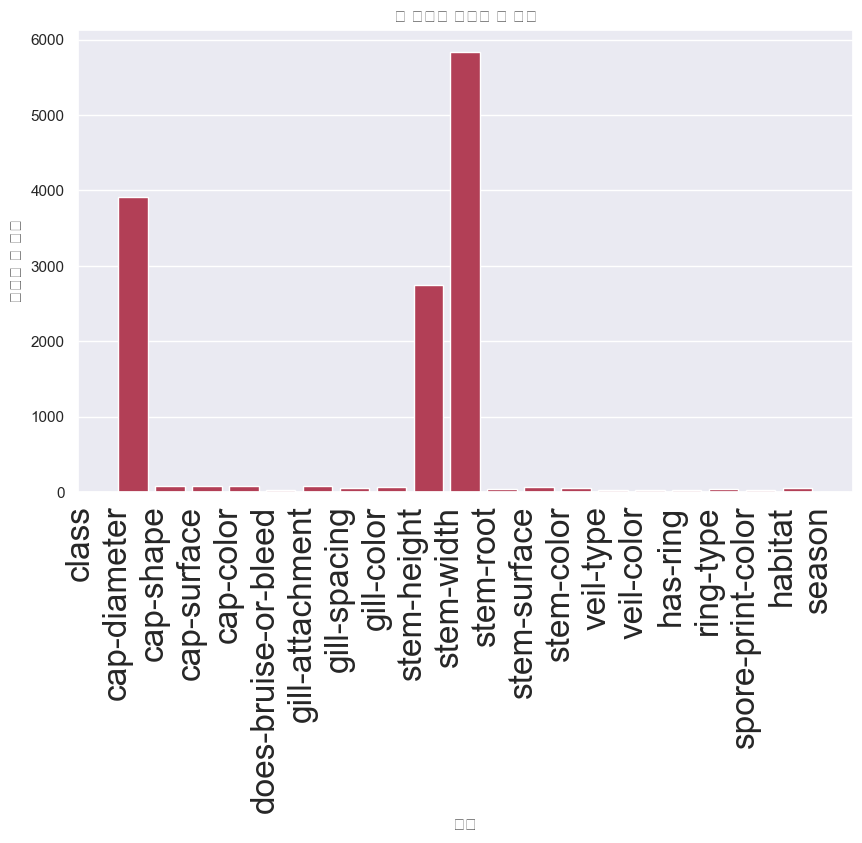

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# id 컬럼을 제외한 데이터프레임 생성
dt_train_X = df_train.drop('id', axis=1)

# 유니크값 개수를 계산
unique_counts = dt_train_X.nunique()

# 바 차트 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values)
plt.xticks(rotation=90, fontsize=24, ha='right')  # x축 라벨 90도 회전
plt.title('각 컬럼의 유니크 값 개수')
plt.ylabel('유니크 값 개수')
plt.xlabel('컬럼')
plt.show()

In [10]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값'] = df.isnull().sum().values
    summary['유니크값'] = df.nunique().values
    summary['첫번째값'] = df.loc[0].values
    summary['두번째값'] = df.loc[1].values
    summary['세번째값'] = df.loc[2].values
    return summary

resumetable(dt_train_X)

데이터 세트 형상: (3116945, 21)


피처       타입      결측값  유니크값   첫번째값  두번째값  세번째값
0                  class   object        0     2      e     p     e
1           cap-diameter  float64        4  3913    8.8  4.51  6.94
2              cap-shape   object       40    74      f     x     f
3            cap-surface   object   671023    83      s     h     s
4              cap-color   object       12    78      u     o     b
5   does-bruise-or-bleed   object        8    26      f     f     f
6        gill-attachment   object   523936    78      a     a     x
7           gill-spacing   object  1258435    48      c     c     c
8             gill-color   object       57    63      w     n     w
9            stem-height  float64        0  2749   4.51  4.79  6.85
10            stem-width  float64        0  5836  15.39  6.48  9.93
11             stem-root   object  2757023    38    NaN   NaN   NaN
12          stem-surface   object  1980861    60    NaN     y     s
13            stem-color   object       38    59      w     o     n
14             veil-type   object  2957493    22    NaN   NaN   NaN
15            veil-color   object  2740947    24    NaN   NaN   NaN
16              has-ring   object       24    23      f     t     f
17             ring-type   object   128880    40      f     z     f
18     spore-print-color   object  2849682    32    NaN   NaN   NaN
19               habitat   object       45    52      d     d     l
20                season   object        0     4      a     w     w

## 중복값 확인

In [11]:
print("There are {} duplicates in the dataset.".format(df_train.duplicated().sum()))


There are 0 duplicates in the dataset.


## 결측값 확인

In [12]:
print("Checking for missing values in each column:")
print(df_train.isnull().sum()) 

Checking for missing values in each column:
id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64


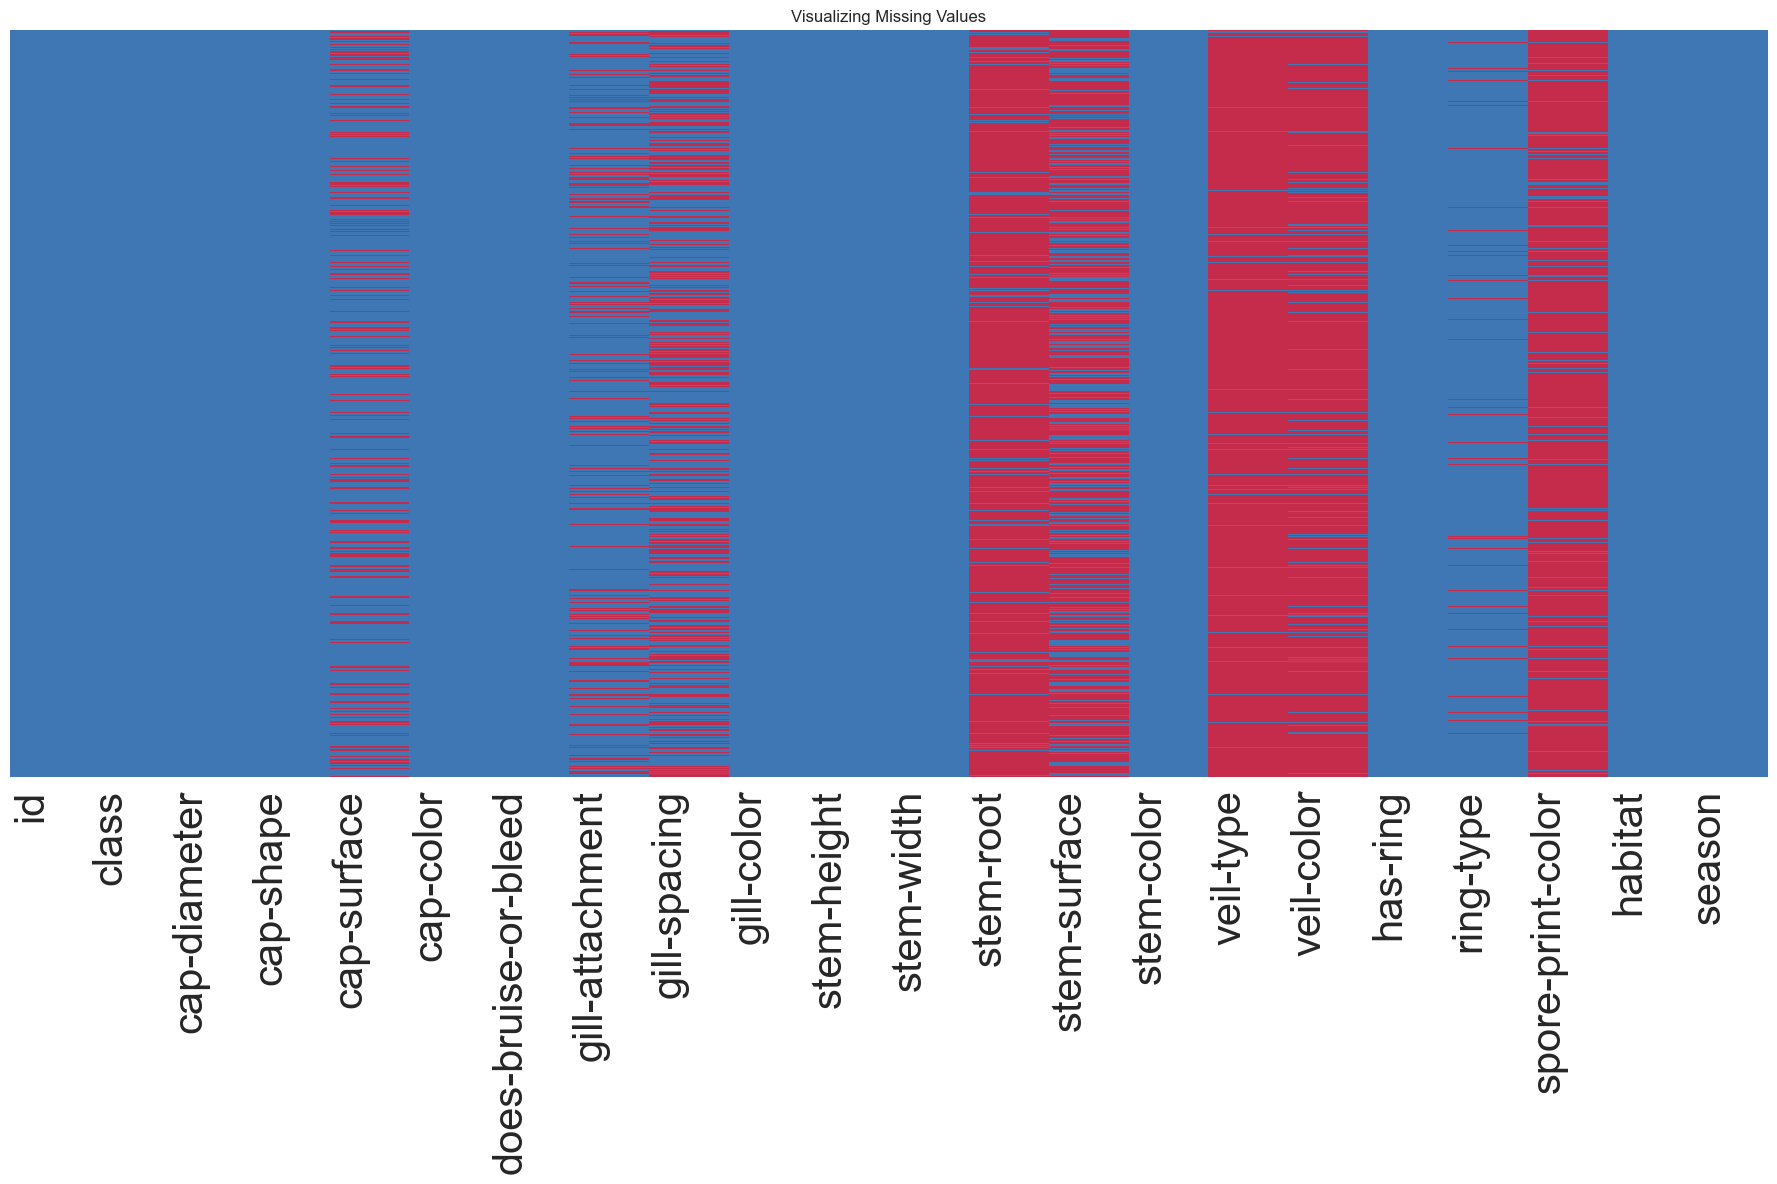

In [13]:
plt.figure(figsize=(18,12))
plt.title("Visualizing Missing Values")
sns.heatmap(df_train.isnull(), cbar=False, cmap=sns.color_palette("Spectral_r", n_colors=13), yticklabels=False)
# x축 레이블 크기 조정
plt.xticks(fontsize=30, ha='right')

# 전체적인 레이아웃 조정 (옵션)
plt.tight_layout()

plt.show()

# 데이터 전처리 파이프라인 구축
* 분석에 필요하지 않은 id 값과 불필요한 열을 제거하고, 각 열의 데이터 유형을 식별해 숫자 열 , 범주 열, 대상 열 목록으로 분리

## 타겟열과 타겟열을 제외한 열들의 오브젝트 타입과 비 오브젝트 타입으로 데이터 분리하기. 

In [14]:
# 원본 DataFrames의 복사본 생성
df_train_cleaned = df_train.copy()
df_test_cleaned = df_test.copy()

# 'id' 열 삭제
df_train_cleaned = df_train_cleaned.drop(['id'], axis=1)

# 타겟 열 정의
target_column = 'class'

# 타겟 열을 제외한 범주형 열 선택(오브젝트 타입을 가져오고, 타겟 열인 class를 drop
categorical_columns = df_train_cleaned.select_dtypes(include=['object']).columns.drop(target_column)

# 타겟 열이 숫자형일 경우 이를 제외한 숫자형 열 선택
numerical_columns = df_train_cleaned.select_dtypes(exclude=['object']).columns.drop(target_column, errors='ignore')

# 열 목록 출력
print("타겟 열:", target_column)
print("\n범주형 열:", categorical_columns.tolist())
print("\n숫자형 열:", numerical_columns.tolist())

타겟 열: class

범주형 열: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']

숫자형 열: ['cap-diameter', 'stem-height', 'stem-width']


## 자주 사용되지 않는 범주의 개수 확인하기

In [15]:
for column in categorical_columns:
    num_unique = df_train_cleaned[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

'cap-shape' has 74 unique categories.
'cap-surface' has 83 unique categories.
'cap-color' has 78 unique categories.
'does-bruise-or-bleed' has 26 unique categories.
'gill-attachment' has 78 unique categories.
'gill-spacing' has 48 unique categories.
'gill-color' has 63 unique categories.
'stem-root' has 38 unique categories.
'stem-surface' has 60 unique categories.
'stem-color' has 59 unique categories.
'veil-type' has 22 unique categories.
'veil-color' has 24 unique categories.
'has-ring' has 23 unique categories.
'ring-type' has 40 unique categories.
'spore-print-color' has 32 unique categories.
'habitat' has 52 unique categories.
'season' has 4 unique categories.


## Top 10 unique value counts for each categorical column

In [16]:
for column in categorical_columns:
    print(f"\nTop value counts in '{column}':\n{df_train_cleaned[column].value_counts().head(10)}")


Top value counts in 'cap-shape':
cap-shape
x    1436026
f     676238
s     365146
b     318646
o     108835
p     106967
c     104520
d         65
e         60
n         41
Name: count, dtype: int64

Top value counts in 'cap-surface':
cap-surface
t    460777
s    384970
y    327826
h    284460
g    263729
d    206832
k    128875
e    119712
i    113440
w    109840
Name: count, dtype: int64

Top value counts in 'cap-color':
cap-color
n    1359542
y     386627
w     379442
g     210825
e     197290
o     178847
p      91838
r      78236
u      73172
b      61313
Name: count, dtype: int64

Top value counts in 'does-bruise-or-bleed':
does-bruise-or-bleed
f    2569743
t     547085
w         14
c         11
h          9
a          7
b          7
x          7
y          7
k          6
Name: count, dtype: int64

Top value counts in 'gill-attachment':
gill-attachment
a    646034
d    589236
x    360878
e    301858
s    295439
p    279110
f    119953
c        74
u        56
w        37
Name: co

## 자주 사용되지 않는 범주를 'Unknown'라는 새로운 범주를 생성해 그룹화
* 우리는 데이터에 자주 나타나지 않는 범주가 있다는 문제에 직면합니다. 이로 인해 해당 범주를 사용하는 것이 어렵습니다. 이 문제를 해결하기 위해 이러한 희귀 범주를 "알 수 없음"이라는 새로운 범주로 그룹화합니다.

In [17]:
# 빈번하지 않은 범주를 식별하고 대체하는 함수 정의
# 컬럼의 value_counts()가 threshold보다 낮은 값들을 unknown으로 처리
def replace_infrequent_categories(df, column, threshold=70):
    value_counts = df[column].value_counts()
    infrequent = value_counts[value_counts <= threshold].index
    df[column] = df[column].apply(lambda x: "Unknown" if x in infrequent else x)
    return df

# 모든 범주형 열에 대해 잘못된 값과 빈번하지 않은 범주 처리
for col in categorical_columns:
    df_train_cleaned = replace_infrequent_categories(df_train_cleaned, col)
    df_test_cleaned = replace_infrequent_categories(df_test_cleaned, col)

# 교체 후 고유 열 수 출력
print("After a replacement:")
for column in categorical_columns:
    num_unique = df_train_cleaned[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

After a replacement:
'cap-shape' has 8 unique categories.
'cap-surface' has 14 unique categories.
'cap-color' has 13 unique categories.
'does-bruise-or-bleed' has 3 unique categories.
'gill-attachment' has 9 unique categories.
'gill-spacing' has 4 unique categories.
'gill-color' has 13 unique categories.
'stem-root' has 6 unique categories.
'stem-surface' has 9 unique categories.
'stem-color' has 14 unique categories.
'veil-type' has 2 unique categories.
'veil-color' has 7 unique categories.
'has-ring' has 3 unique categories.
'ring-type' has 10 unique categories.
'spore-print-color' has 8 unique categories.
'habitat' has 9 unique categories.
'season' has 4 unique categories.


## 범주형 변수의 카디널리티 확인(unknown 포함 된 원본)



cap-shape:
  Unique categories: 8
  Top 10 categories:
cap-shape
x          1436026
f           676238
s           365146
b           318646
o           108835
p           106967
c           104520
Unknown        527
Name: count, dtype: int64

cap-surface:
  Unique categories: 14
  Top 10 categories:
cap-surface
t    460777
s    384970
y    327826
h    284460
g    263729
d    206832
k    128875
e    119712
i    113440
w    109840
Name: count, dtype: int64

cap-color:
  Unique categories: 13
  Top 10 categories:
cap-color
n    1359542
y     386627
w     379442
g     210825
e     197290
o     178847
p      91838
r      78236
u      73172
b      61313
Name: count, dtype: int64

does-bruise-or-bleed:
  Unique categories: 3
  Top 10 categories:
does-bruise-or-bleed
f          2569743
t           547085
Unknown        109
Name: count, dtype: int64

gill-attachment:
  Unique categories: 9
  Top 10 categories:
gill-attachment
a          646034
d          589236
x          360878
e          30

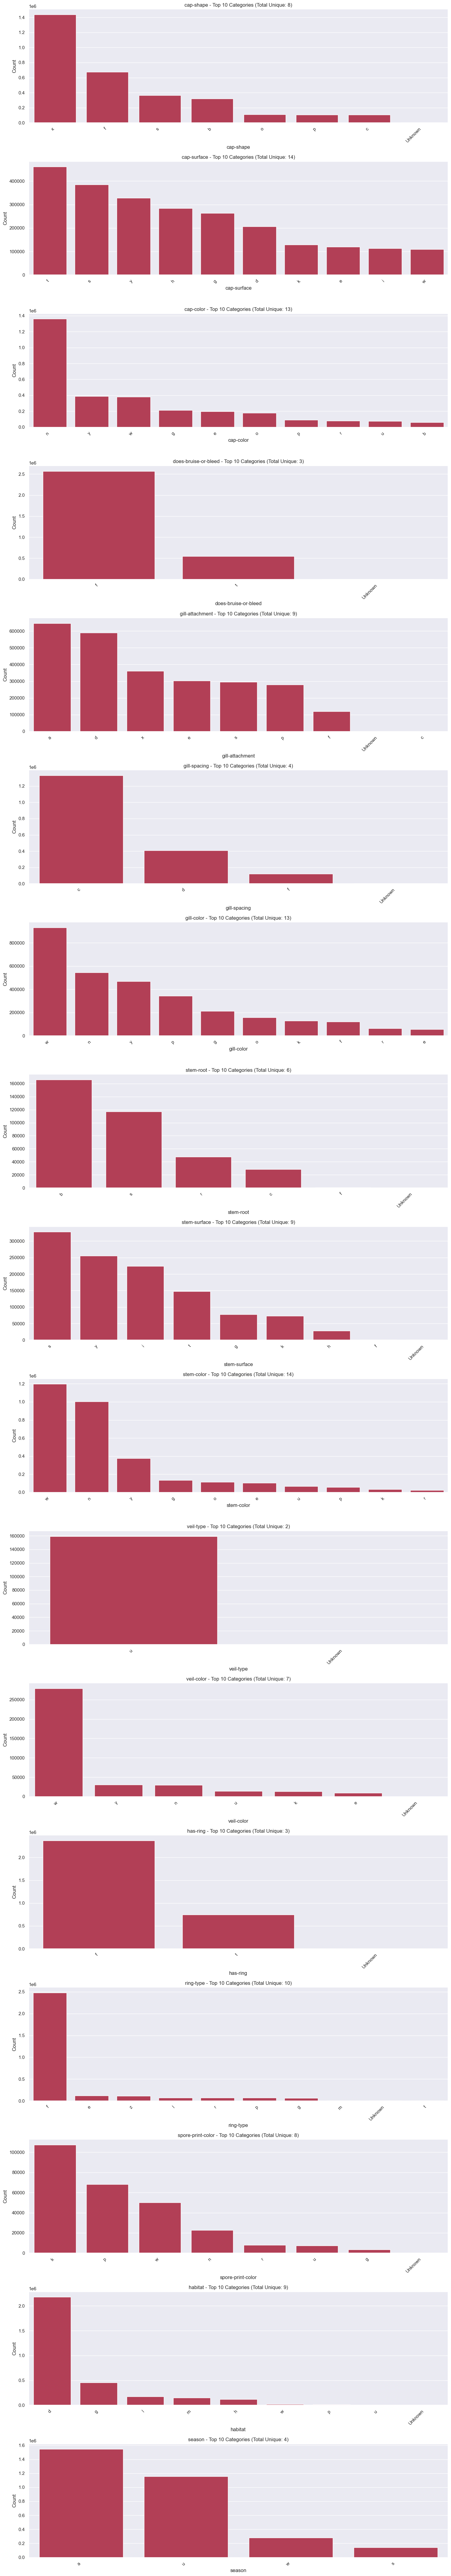

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def check_cardinality(df, categorical_columns, top_n=10):
    cardinality_info = {}
    
    for col in categorical_columns:
        # 고유값 개수 계산
        unique_count = df[col].nunique()
        
        # 상위 N개 범주와 그 빈도 계산
        top_categories = df[col].value_counts().head(top_n)
        
        cardinality_info[col] = {
            'unique_count': unique_count,
            'top_categories': top_categories
        }
    
    return cardinality_info

def plot_cardinality(cardinality_info, top_n=10):
    n_cols = len(cardinality_info)
    fig, axs = plt.subplots(n_cols, 1, figsize=(15, 5*n_cols), squeeze=False)
    
    for i, (col, info) in enumerate(cardinality_info.items()):
        ax = axs[i, 0]
        sns.barplot(x=info['top_categories'].index, y=info['top_categories'].values, ax=ax)
        ax.set_title(f"{col} - Top {top_n} Categories (Total Unique: {info['unique_count']})")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# 범주형 변수의 카디널리티 확인
cardinality_info = check_cardinality(df_train_cleaned, categorical_columns)

# 결과 출력
for col, info in cardinality_info.items():
    print(f"\n{col}:")
    print(f"  Unique categories: {info['unique_count']}")
    print(f"  Top 10 categories:\n{info['top_categories']}")

# 시각화
plot_cardinality(cardinality_info)

## 숫자열 결측값 처리하기
다음으로 각 열의 값 분포를 살펴보겠습니다. 열의 값이 비대칭이면 이상치의 영향을 덜 받기 때문에 중앙값을 사용하여 결측값을 채웁니다. 

값이 더 대칭적으로 분포되면 평균을 사용합니다. 이러한 경우 중심 경향을 더 정확하게 나타내기 때문에, 값이 더 대칭적으로 분포되면 평균을 사용합니다.

### 수치형 열들의 비대칭도(skewness)를 계산
데이터의 수치형 열들의 비대칭도(skewness)를 계산
* 비대칭도 = 0: 완벽하게 대칭인 분포 (예: 정규 분포)
* 비대칭도 > 0: 오른쪽으로 꼬리가 긴 분포 (양의 비대칭)
* 비대칭도 < 0: 왼쪽으로 꼬리가 긴 분포 (음의 비대칭)

일반적으로:
* |비대칭도| < 0.5: 거의 대칭
* 0.5 < |비대칭도| < 1: 중간 정도의 비대칭
* |비대칭도| > 1: 매우 비대칭

In [19]:
# 데이터의 수치형 열들의 비대칭도(skewness)를 계산
print("The skewness of columns:")
print(df_train_cleaned[numerical_columns].skew())

The skewness of columns:
cap-diameter    3.972609
stem-height     1.926682
stem-width      1.235427
dtype: float64


## 첨도 확인
첨도(Kurtosis):
* 3에 가까우면 정규 분포와 유사한 뾰족함
* 3보다 크면 정규 분포보다 뾰족함 (heavy-tailed)
* 3보다 작으면 정규 분포보다 평평함 (light-tailed)

In [20]:
print("The kurtosis of columns:")
print(df_train_cleaned[numerical_columns].kurtosis())

The kurtosis of columns:
cap-diameter    32.743381
stem-height      7.761550
stem-width       2.448976
dtype: float64


## 첨도와 왜도 시각화

### Q-Q plot 해석:

cap-diameter (첫 번째 그래프):
붉은 선이 없어 정규성 참조 기준이 없습니다.
데이터 점들이 S자 형태를 띠고 있어, 정규 분포에서 크게 벗어났음을 나타냅니다.
z-score가 증가함에 따라 데이터 값이 급격히 증가하는 패턴을 보입니다. 이는 오른쪽으로 긴 꼬리(right-skewed)를 가진 분포를 시사합니다.
stem-height (두 번째 그래프):
붉은 선(정규성 참조선)이 있지만, 데이터 점들이 이 선에서 벗어나 있습니다.
z-score가 0에 가까울 때(평균 근처)는 정규 분포와 유사하지만, 양 끝으로 갈수록 크게 벗어납니다.
특히 양의 z-score에서 데이터 값이 급격히 증가하여, 오른쪽 꼬리가 두꺼운(heavy-tailed) 분포임을 나타냅니다.
stem-width (세 번째 그래프):
stem-height와 유사한 패턴을 보이지만, 정규성에서 더 크게 벗어났습니다.
음의 z-score에서는 데이터 값이 완만하게 증가하다가, 양의 z-score에서 급격히 증가합니다.
이는 매우 비대칭적이고 오른쪽으로 긴 꼬리를 가진 분포를 의미합니다.
종합적 해석:

모든 변수가 정규 분포에서 벗어나 있으며, 특히 양의 방향으로 긴 꼬리를 가지고 있습니다.
cap-diameter가 가장 심각하게 정규성을 위배하고 있습니다.
stem-height와 stem-width도 정규 분포와는 거리가 있지만, cap-diameter보다는 덜 극단적입니다.\

 ### 데이터 변환(예: 로그 변환, Box-Cox 변환)이나 비모수적 방법을 고려해야 할 것 같습니다. 또한, 이상치 처리와 함께 각 변수의 특성을 고려한 개별적인 전처리 전략을 수립하는 것이 좋겠습니다.

Distribution statistics of numerical columns:
              Skewness   Kurtosis
cap-diameter  3.972609  32.743381
stem-height   1.926682   7.761550
stem-width    1.235427   2.448976


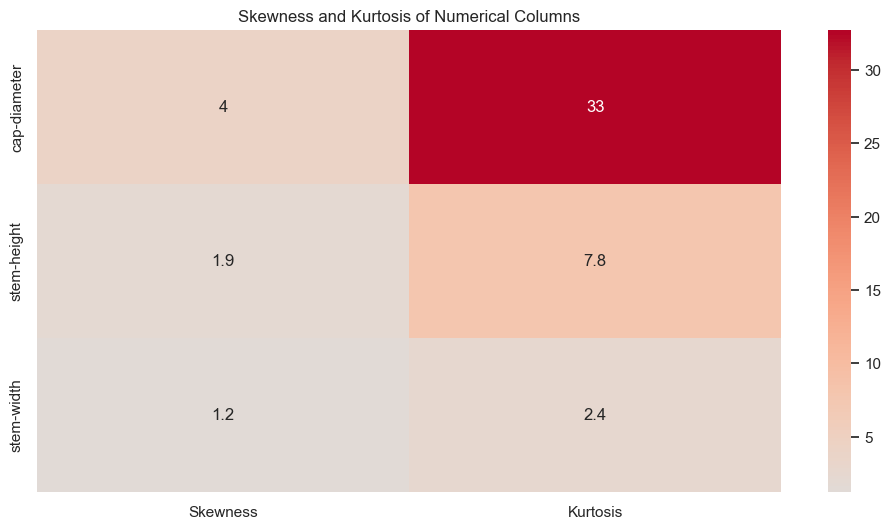

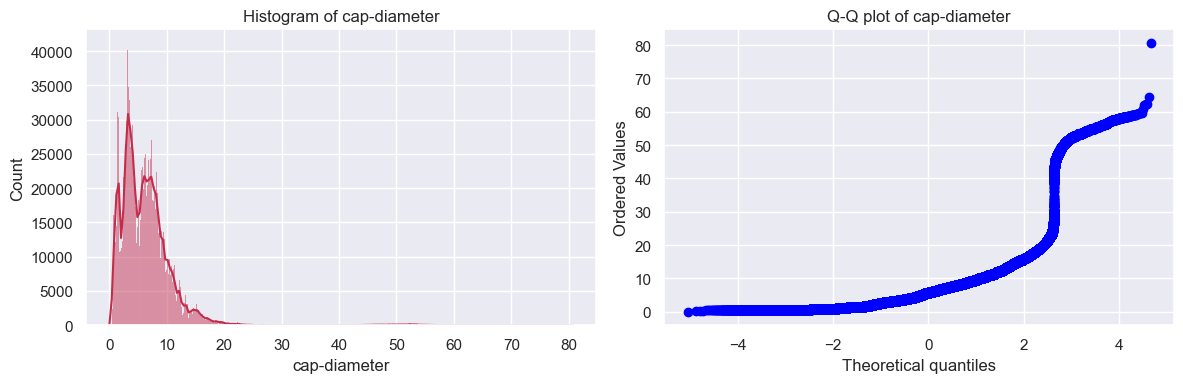

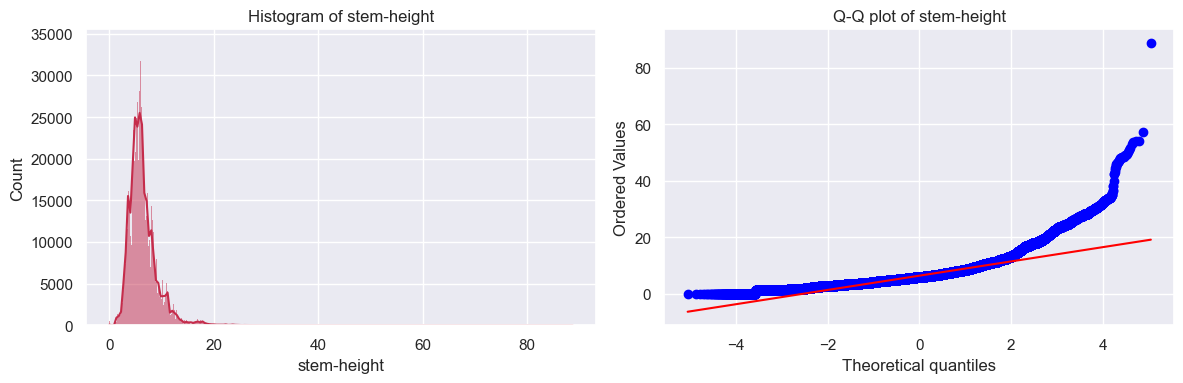

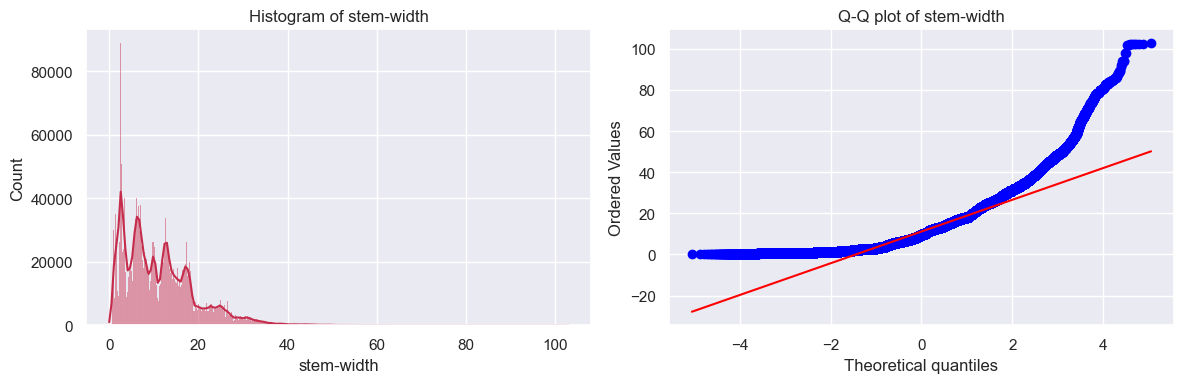

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 왜도와 첨도를 함께 계산
skewness = df_train_cleaned[numerical_columns].skew()
kurtosis = df_train_cleaned[numerical_columns].kurtosis()

# 결과를 데이터프레임으로 만들기
distribution_stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print("Distribution statistics of numerical columns:")
print(distribution_stats)

# 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(distribution_stats, annot=True, cmap='coolwarm', center=0)
plt.title('Skewness and Kurtosis of Numerical Columns')
plt.show()

# 히스토그램과 QQ plot
for column in numerical_columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # 히스토그램
    sns.histplot(df_train_cleaned[column], kde=True, ax=ax1)
    ax1.set_title(f'Histogram of {column}')
    
    # QQ plot
    from scipy import stats
    stats.probplot(df_train_cleaned[column], dist="norm", plot=ax2)
    ax2.set_title(f'Q-Q plot of {column}')
    
    plt.tight_layout()
    plt.show()

## Big-Cox 변환
Q-Q plot부분. 붉은색 라인에 맞춰 파란색 값들이 쌓여야하는데 정규분포의 모습을 보여주는 것입니다. 하지만 그렇지 못한 모습을 보이고 있죠. 첫번재 cap-diameter는 붉은색 자체가 없습니다. 정규분포에 관해 완전히 잘못된 값을 보여주고 있다는 것입니다. 아래 코드에서 Box-Cox 변환을 통해 개선해보고자 합니다. 

Distribution statistics of numerical columns:
              Skewness   Kurtosis
cap-diameter  3.972609  32.743381
stem-height   1.926682   7.761550
stem-width    1.235427   2.448976


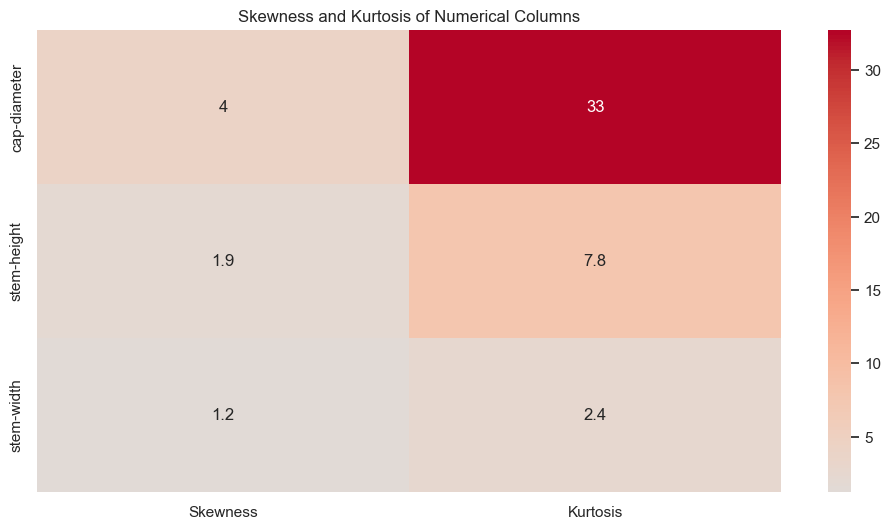

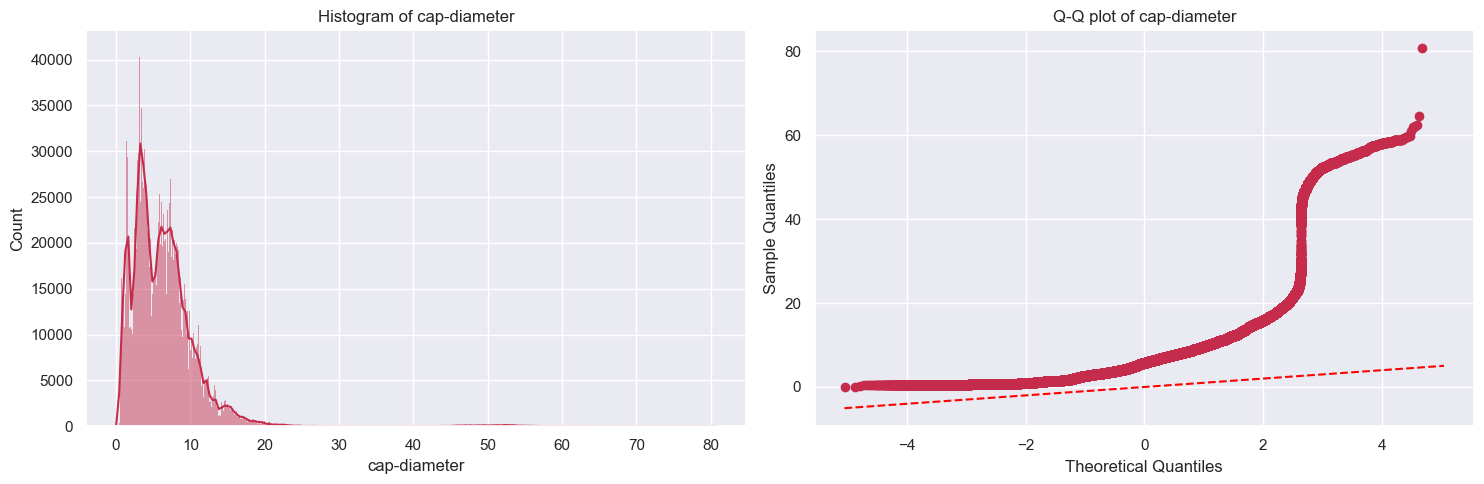

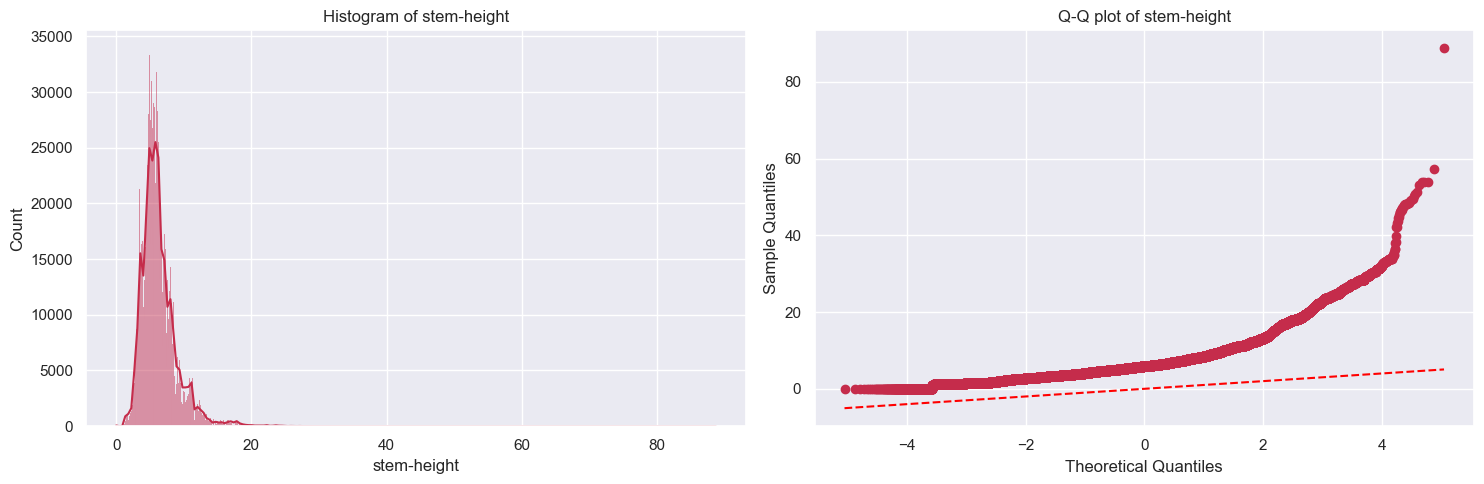

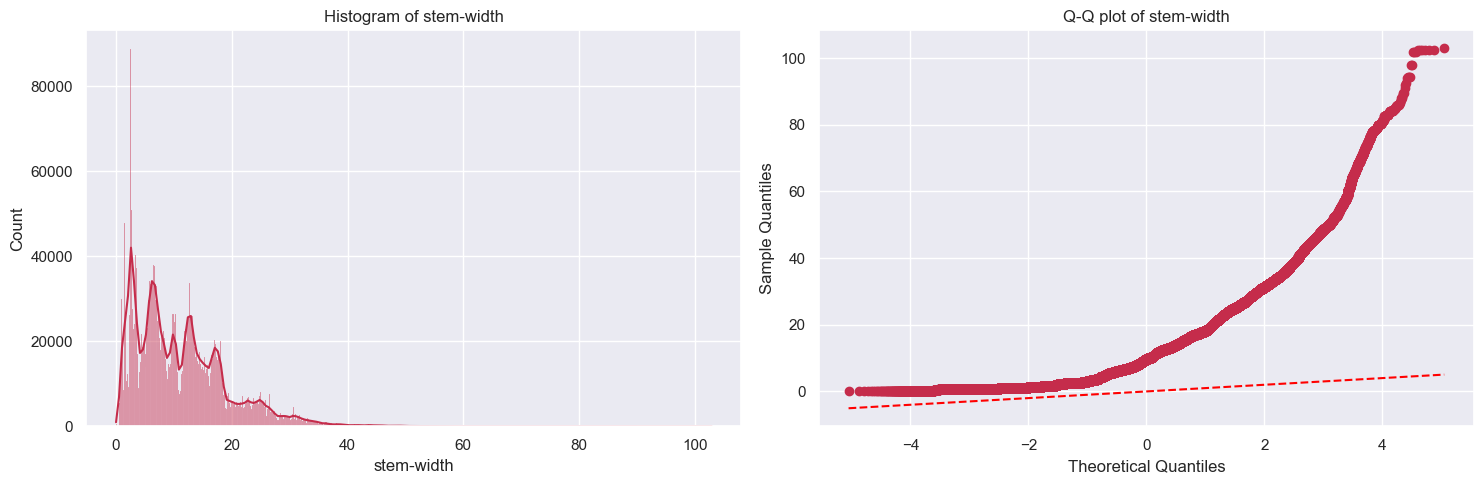

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 왜도와 첨도를 함께 계산
skewness = df_train_cleaned[numerical_columns].skew()
kurtosis = df_train_cleaned[numerical_columns].kurtosis()

# 결과를 데이터프레임으로 만들기
distribution_stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print("Distribution statistics of numerical columns:")
print(distribution_stats)

# 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(distribution_stats, annot=True, cmap='coolwarm', center=0)
plt.title('Skewness and Kurtosis of Numerical Columns')
plt.show()

# 히스토그램과 QQ plot
for column in numerical_columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # 히스토그램
    sns.histplot(df_train_cleaned[column], kde=True, ax=ax1)
    ax1.set_title(f'Histogram of {column}')
    
    # QQ plot
    (osm, osr), _ = stats.probplot(df_train_cleaned[column], dist="norm", fit=True)
    ax2.scatter(osm, osr)
    ax2.plot(osm, osm, color='red', linestyle='--')  # 대각선 참조선 추가
    ax2.set_title(f'Q-Q plot of {column}')
    ax2.set_xlabel('Theoretical Quantiles')
    ax2.set_ylabel('Sample Quantiles')
    
    plt.tight_layout()
    plt.show()

    # Box-Cox 변환 (선택적)
    if np.all(df_train_cleaned[column] > 0):  # 양수 값에 대해서만 적용
        transformed_data, lambda_param = stats.boxcox(df_train_cleaned[column])
        print(f"Optimal lambda for {column}: {lambda_param}")
        
        # 변환된 데이터의 Q-Q plot
        plt.figure(figsize=(8, 5))
        stats.probplot(transformed_data, dist="norm", plot=plt)
        plt.title(f'Q-Q plot of Box-Cox transformed {column}')
        plt.show()

Box-Cox 변환을 하긴 했지만, 여전히 정규분포와는 거리가 많이 멀어보입니다. 그래도, 맨 cap-diameter의 붉은 선이 보인걸로 봐선 조금의 개선이 된것 같습니만 여전히 부족합니다

## Box-Cox변환 대신에 로그변환

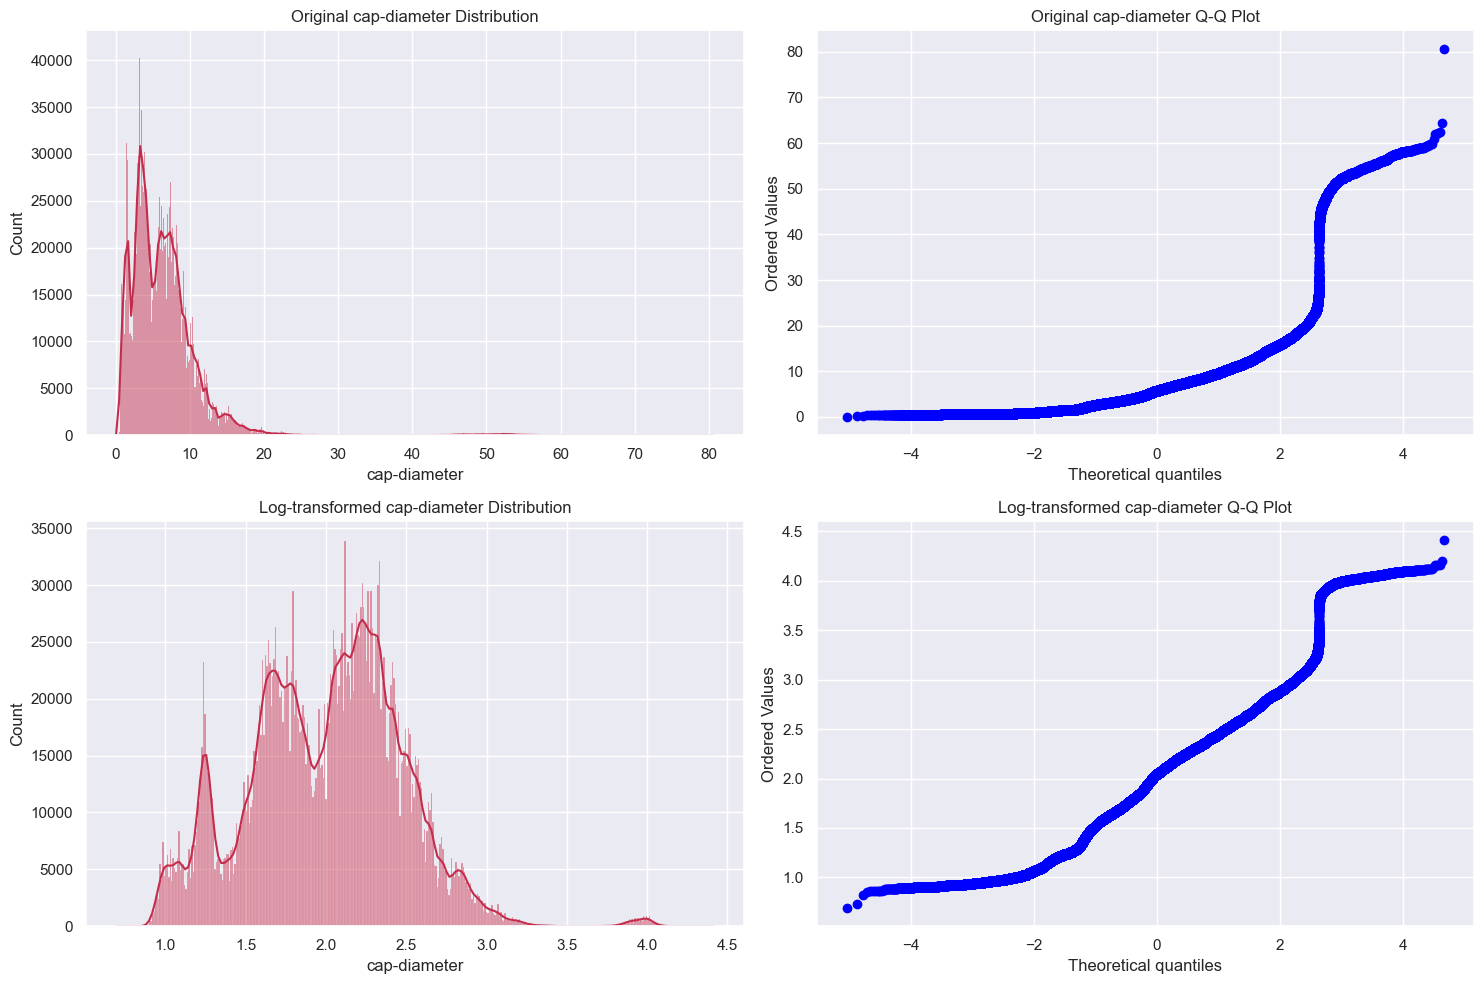

cap-diameter:
Original - Skewness: 3.97, Kurtosis: 32.74
Log-transformed - Skewness: 0.11, Kurtosis: 0.36




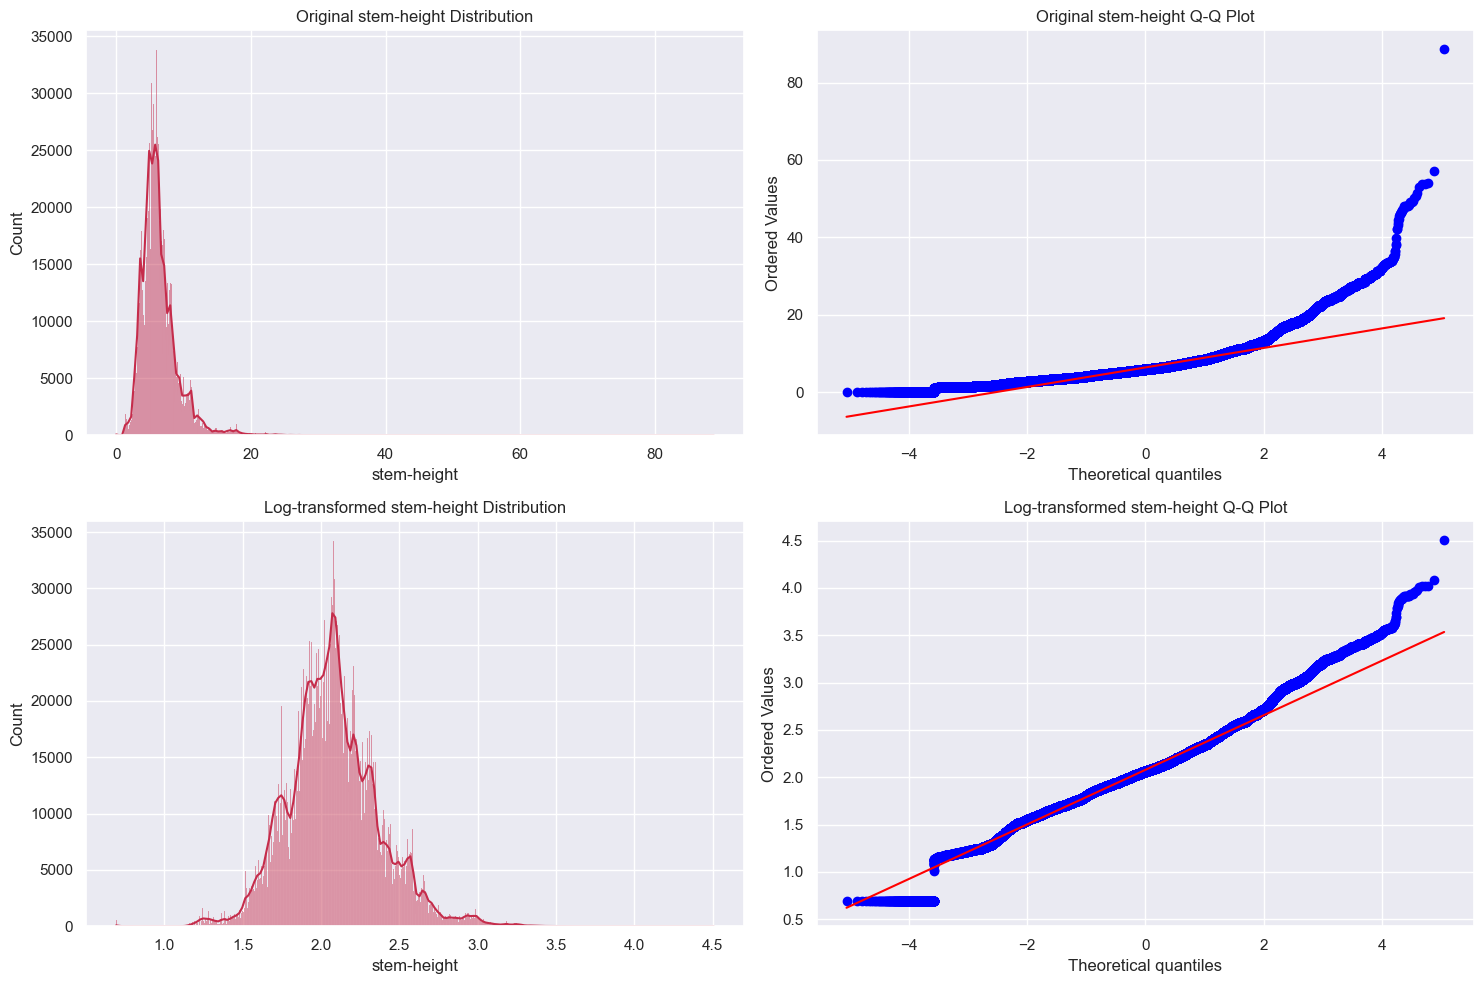

stem-height:
Original - Skewness: 1.93, Kurtosis: 7.76
Log-transformed - Skewness: 0.42, Kurtosis: 1.03




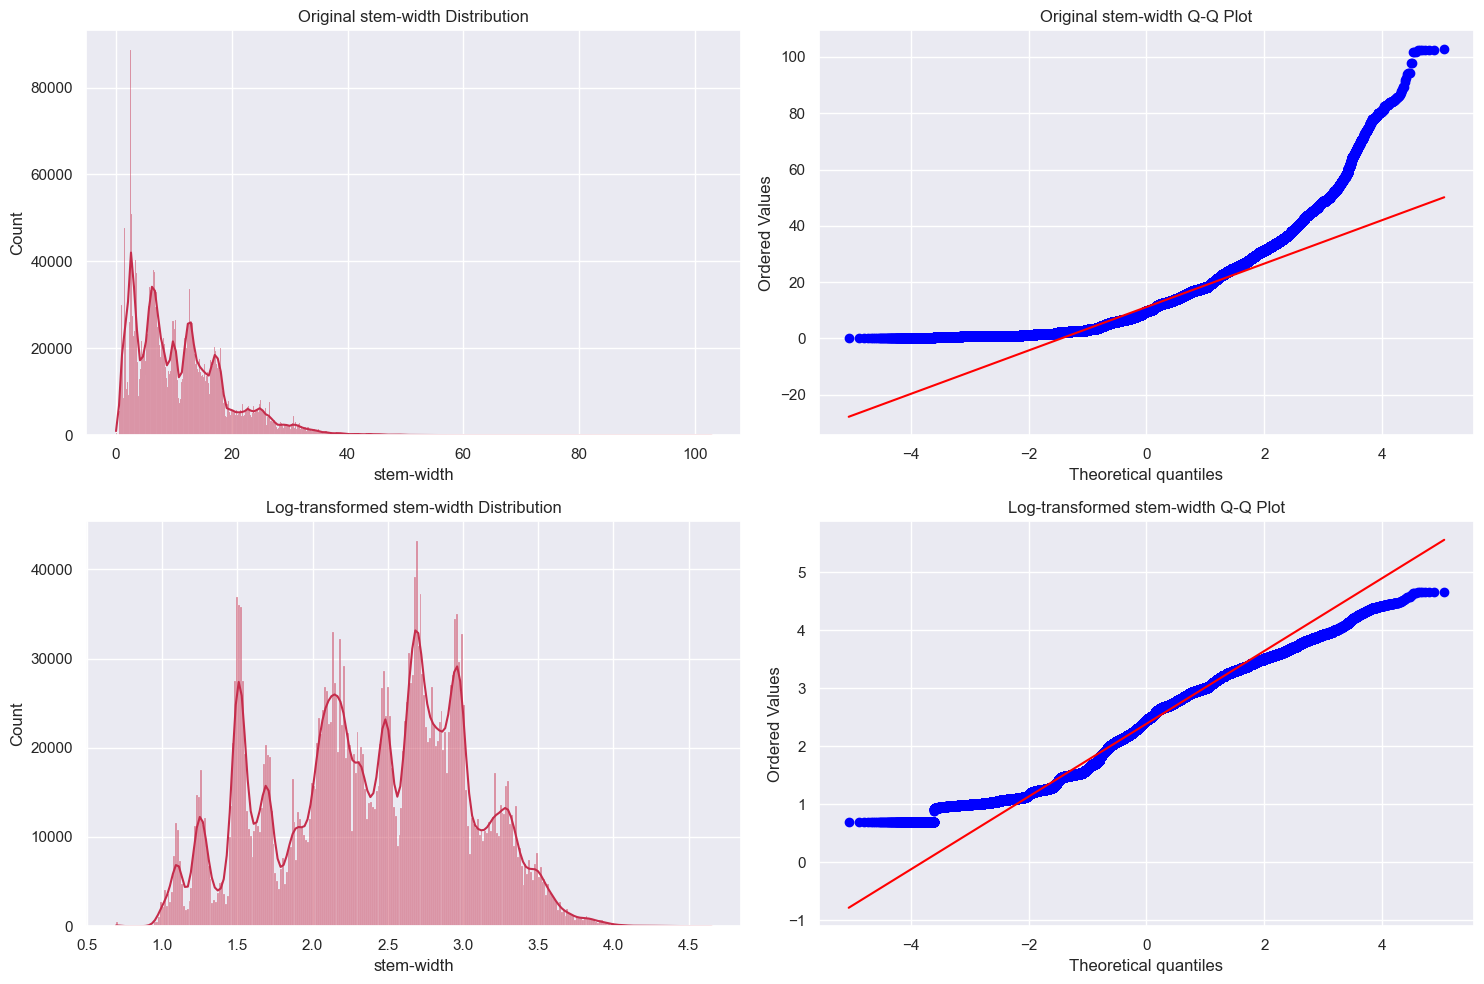

stem-width:
Original - Skewness: 1.24, Kurtosis: 2.45
Log-transformed - Skewness: -0.17, Kurtosis: -0.74




In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 로그 변환 함수 (0 또는 음수 값 처리 포함)
def log_transform(x):
    return np.log1p(x - np.min(x) + 1)

# 각 수치형 변수에 대해 로그 변환 적용 및 시각화
for column in numerical_columns:
    # 원본 데이터
    original_data = df_train_cleaned[column]
    
    # 로그 변환 데이터
    log_data = log_transform(original_data)
    
    # 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 원본 데이터 히스토그램
    sns.histplot(original_data, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title(f'Original {column} Distribution')
    
    # 원본 데이터 Q-Q plot
    stats.probplot(original_data, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title(f'Original {column} Q-Q Plot')
    
    # 로그 변환 데이터 히스토그램
    sns.histplot(log_data, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title(f'Log-transformed {column} Distribution')
    
    # 로그 변환 데이터 Q-Q plot
    stats.probplot(log_data, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title(f'Log-transformed {column} Q-Q Plot')
    
    plt.tight_layout()
    plt.show()
    
    # 왜도와 첨도 비교
    original_skew = original_data.skew()
    original_kurt = original_data.kurtosis()
    log_skew = log_data.skew()
    log_kurt = log_data.kurtosis()
    
    print(f"{column}:")
    print(f"Original - Skewness: {original_skew:.2f}, Kurtosis: {original_kurt:.2f}")
    print(f"Log-transformed - Skewness: {log_skew:.2f}, Kurtosis: {log_kurt:.2f}")
    print("\n")

## stem-height, stem-width는 로그변환. cap-diameter는 box-cox변환 적용
로그 변환으로 stem-height, stem-width변수는 개선이 되긴했지만. cap-diameter변수에 대해서는 효과가 없습니다. 즉, stem-height, stem-width는 로그변환으로, cap-diameter는 box-cox 변환으로 처리하면 될 것으로 보입니다.

In [16]:
numerical_columns_stem = numerical_columns[1:]
numerical_columns2_cap = numerical_columns[:1]


# 로그변환
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 로그 변환 함수 (0 또는 음수 값 처리 포함)
def log_transform(x):
    return np.log1p(x - np.min(x) + 1)

# 각 수치형 변수에 대해 로그 변환 적용 및 시각화
for column in numerical_columns_stem:
    # 원본 데이터
    original_data = df_train_cleaned[column]
    # 로그 변환 데이터
    log_data = log_transform(original_data)
    
#box-cox 변환

if np.all(df_train_cleaned[numerical_columns2_cap] > 0 ):  # 양수 값에 대해서만 적용
    transformed_data, lambda_param = stats.boxcox(df_train_cleaned[numerical_columns2_cap])


Distribution statistics of transformed numerical columns:
              Skewness   Kurtosis
cap-diameter  3.972609  32.743381
stem-height   0.423213   1.033688
stem-width   -0.169743  -0.742838


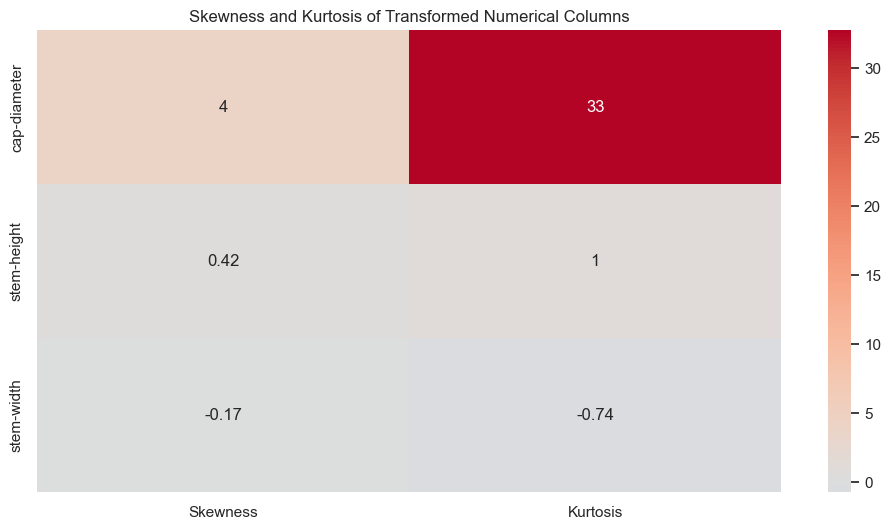

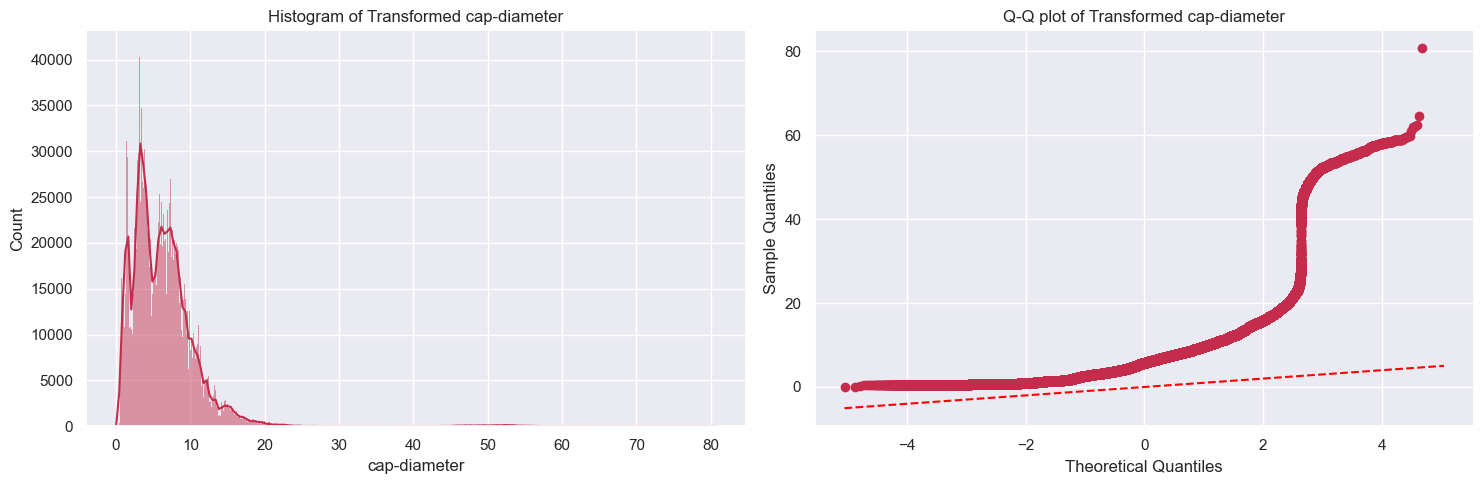

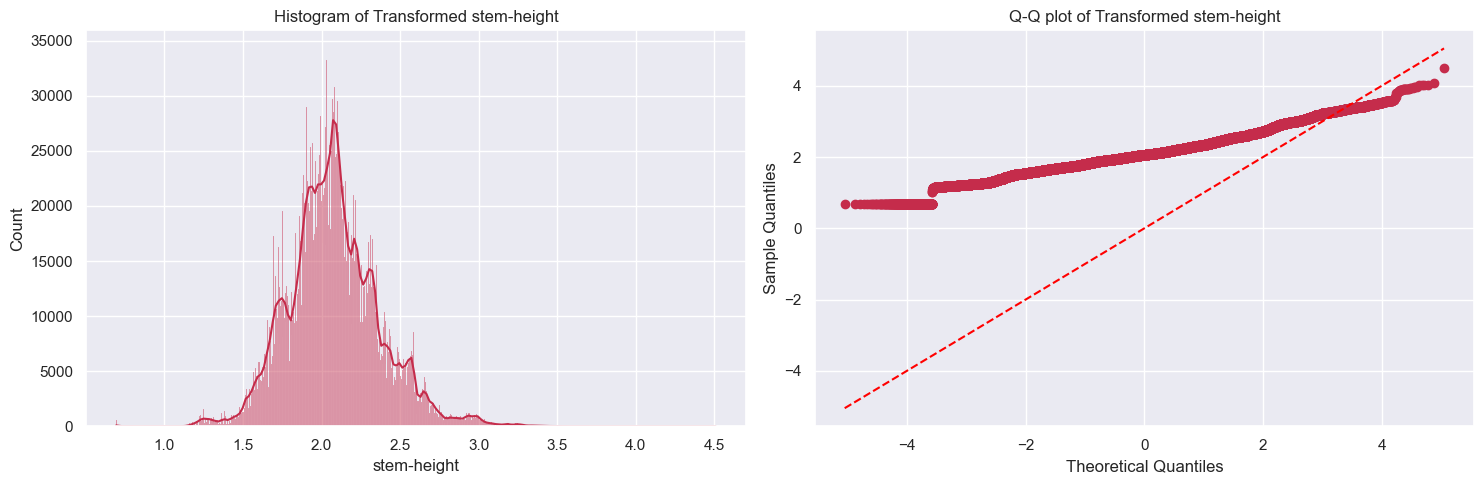

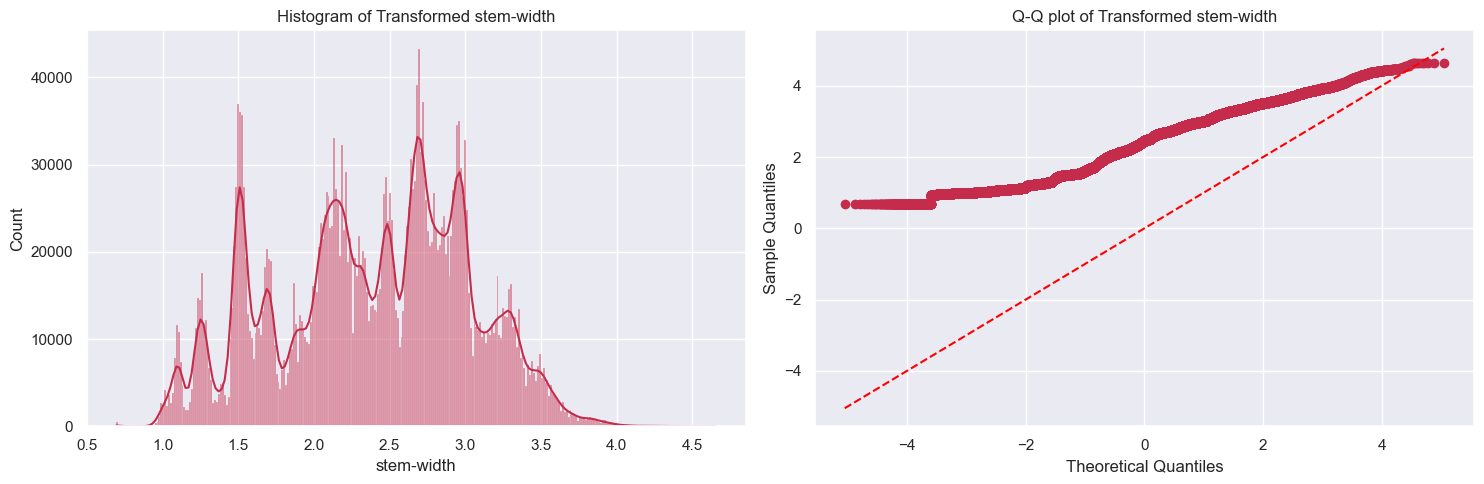

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

numerical_columns_stem = numerical_columns[1:]
numerical_columns2_cap = numerical_columns[:1]

# 로그 변환 함수
def log_transform(x):
    return np.log1p(x - np.min(x) + 1)

# 데이터프레임 복사
df_transformed = df_train_cleaned.copy()

# stem 변수들에 대해 로그 변환 적용
for column in numerical_columns_stem:
    df_transformed[column] = log_transform(df_transformed[column])

# cap-diameter에 Box-Cox 변환 적용
if np.all(df_transformed[numerical_columns2_cap[0]] > 0):
    df_transformed[numerical_columns2_cap[0]], lambda_param = stats.boxcox(df_transformed[numerical_columns2_cap[0]])
    print(f"Optimal lambda for {numerical_columns2_cap[0]}: {lambda_param}")

# 변환된 데이터를 원래의 df_train_cleaned에 적용
df_train_cleaned[numerical_columns] = df_transformed[numerical_columns]

# 시각화
# 왜도와 첨도 계산
skewness = df_train_cleaned[numerical_columns].skew()
kurtosis = df_train_cleaned[numerical_columns].kurtosis()

# 결과를 데이터프레임으로 만들기
distribution_stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print("Distribution statistics of transformed numerical columns:")
print(distribution_stats)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(distribution_stats, annot=True, cmap='coolwarm', center=0)
plt.title('Skewness and Kurtosis of Transformed Numerical Columns')
plt.show()

# 히스토그램과 QQ plot
for column in numerical_columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # 히스토그램
    sns.histplot(df_train_cleaned[column], kde=True, ax=ax1)
    ax1.set_title(f'Histogram of Transformed {column}')
    
    # QQ plot
    (osm, osr), _ = stats.probplot(df_train_cleaned[column], dist="norm", fit=True)
    ax2.scatter(osm, osr)
    ax2.plot(osm, osm, color='red', linestyle='--')  # 대각선 참조선 추가
    ax2.set_title(f'Q-Q plot of Transformed {column}')
    ax2.set_xlabel('Theoretical Quantiles')
    ax2.set_ylabel('Sample Quantiles')
    
    plt.tight_layout()
    plt.show()

Optimal lambda for cap-diameter: 0.2282074368440131
Data types after transformation:
cap-diameter    float64
stem-height     float64
stem-width      float64
dtype: object

Distribution statistics of transformed numerical columns:
              Skewness  Kurtosis
cap-diameter  0.024155  0.733387
stem-height   0.423213  1.033688
stem-width   -0.169743 -0.742838


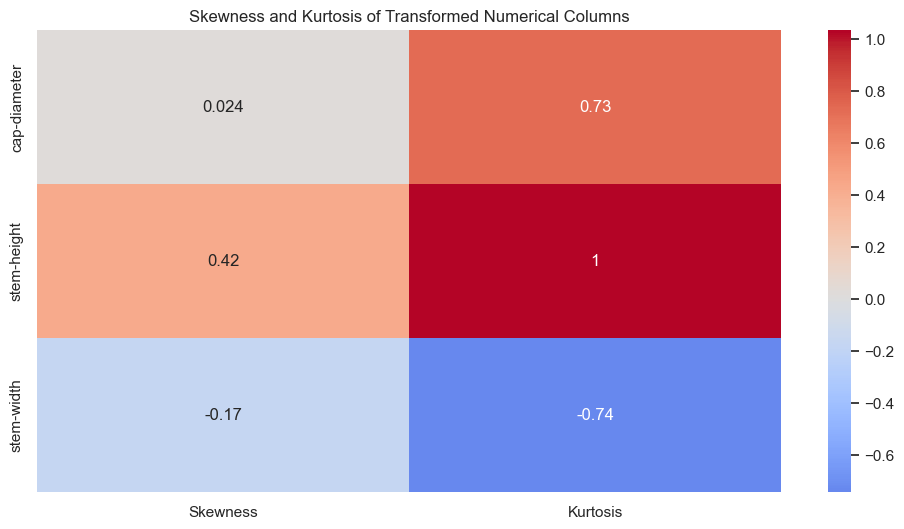

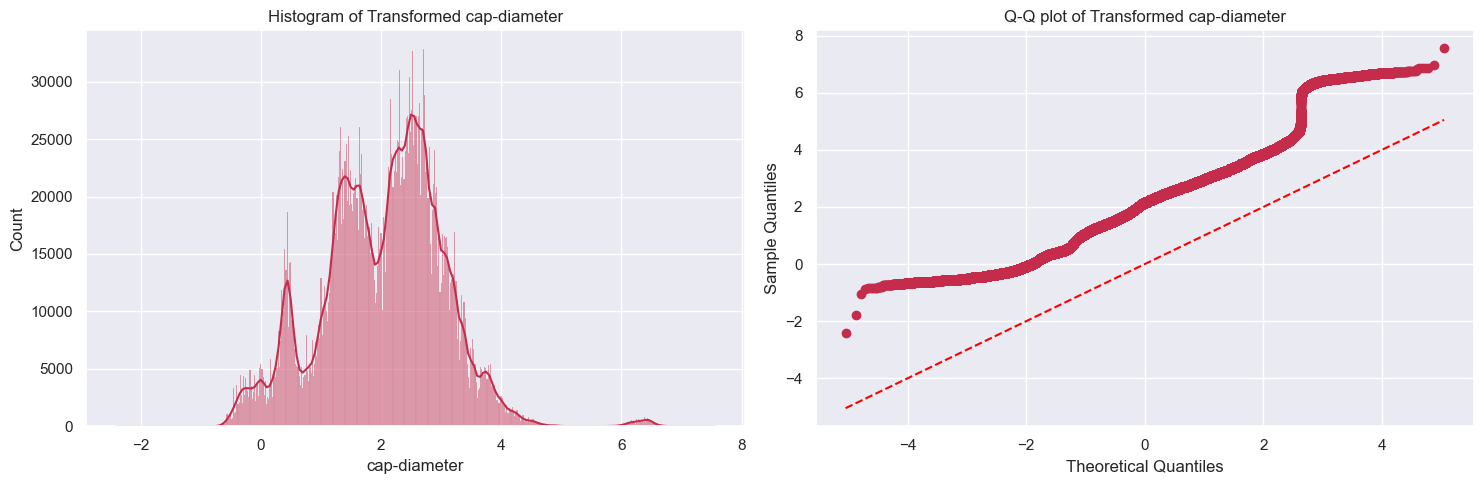

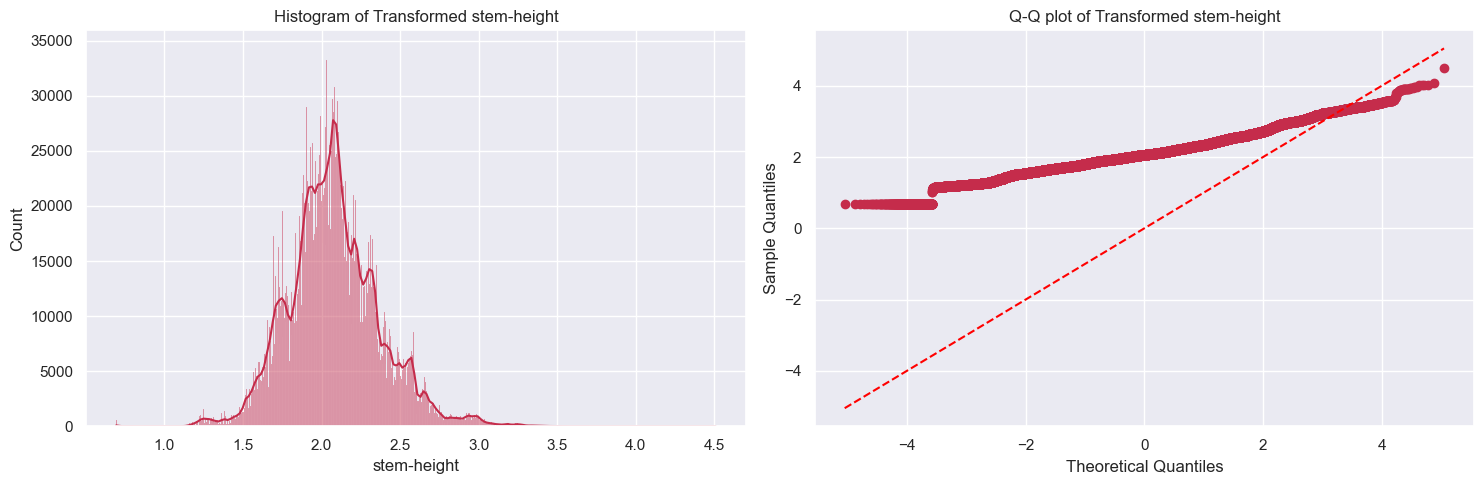

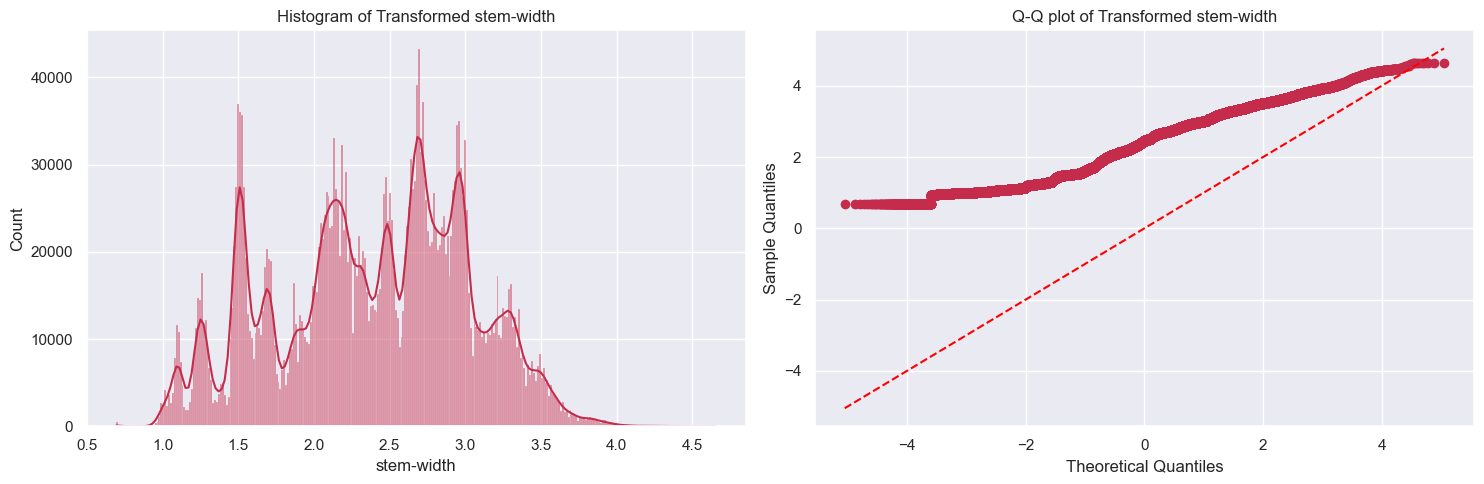

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

numerical_columns_stem = numerical_columns[1:]
numerical_columns2_cap = numerical_columns[:1]

# 로그 변환 함수
def log_transform(x):
    return np.log1p(x - np.min(x) + 1)

# 데이터프레임 복사
df_transformed = df_train_cleaned.copy()

# "Unknown" 값을 NaN으로 변환
for column in numerical_columns:
    df_transformed[column] = pd.to_numeric(df_transformed[column], errors='coerce')

# NaN 값을 평균으로 대체
df_transformed[numerical_columns] = df_transformed[numerical_columns].fillna(df_transformed[numerical_columns].mean())

# stem 변수들에 대해 로그 변환 적용
for column in numerical_columns_stem:
    df_transformed[column] = log_transform(df_transformed[column])

# cap-diameter에 Box-Cox 변환 적용
if np.all(df_transformed[numerical_columns2_cap[0]] > 0):
    df_transformed[numerical_columns2_cap[0]], lambda_param = stats.boxcox(df_transformed[numerical_columns2_cap[0]])
    print(f"Optimal lambda for {numerical_columns2_cap[0]}: {lambda_param}")

# 변환된 데이터를 원래의 df_train_cleaned에 적용
df_train_cleaned[numerical_columns] = df_transformed[numerical_columns]

# 데이터 타입 확인
print("Data types after transformation:")
print(df_train_cleaned[numerical_columns].dtypes)

# 시각화
# 왜도와 첨도 계산
skewness = df_train_cleaned[numerical_columns].skew()
kurtosis = df_train_cleaned[numerical_columns].kurtosis()

# 결과를 데이터프레임으로 만들기
distribution_stats = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print("\nDistribution statistics of transformed numerical columns:")
print(distribution_stats)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(distribution_stats, annot=True, cmap='coolwarm', center=0)
plt.title('Skewness and Kurtosis of Transformed Numerical Columns')
plt.show()

# 히스토그램과 QQ plot
for column in numerical_columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # 히스토그램
    sns.histplot(df_train_cleaned[column], kde=True, ax=ax1)
    ax1.set_title(f'Histogram of Transformed {column}')
    
    # QQ plot
    (osm, osr), _ = stats.probplot(df_train_cleaned[column], dist="norm", fit=True)
    ax2.scatter(osm, osr)
    ax2.plot(osm, osm, color='red', linestyle='--')  # 대각선 참조선 추가
    ax2.set_title(f'Q-Q plot of Transformed {column}')
    ax2.set_xlabel('Theoretical Quantiles')
    ax2.set_ylabel('Sample Quantiles')
    
    plt.tight_layout()
    plt.show()

## 범주형 결측값 처리하기
범주형 결측값 대입
예측의 정확도를 극대화 하기 위해 범주형 열에 있는 모든 결측값을 'Unknown'으로 대체하여 분석을 위해 가능한 많은 열을 유지할 수 있도록 합니다.


In [46]:
# 로그변환, box-cox변환에 의해 불필요 해진 코드

# Impute any missing values with 'Unknown'
# df_train_cleaned = df_train_cleaned.fillna("Unknown")
# df_test_cleaned = df_test_cleaned.fillna("Unknown")


## 데이터의 중복 제거


In [23]:
print("There are {} duplicates in train dataset.".format(df_train_cleaned.duplicated().sum()))
print("There are {} duplicates in test dataset.".format(df_test_cleaned.duplicated().sum()))
df_train_cleaned = df_train_cleaned.drop_duplicates()

There are 0 duplicates in train dataset.
There are 0 duplicates in test dataset.


## 수치형 특징의 분포(kde 사용)
수치 열의 분포는 이상치로 오른쪽으로 치우쳐 있는데, 이는 대부분의 값이 분포의 왼쪽에 집중되어 있지만 나머지 값에서

멀리 떨어진 비정상적으로 높은 값(이상치)이 있다는 것을 의미합니다. 

이는 데이터가 정규 분포를 따르지 않을 수 있으며, 이는 분석 및 모델링 결과에 영향을 미칠 수 있음을 시사합니다.

### 수치형 특징의 분포를 KDE와 함께 시각화 할때 다음 사항들을 중점으로 살피면 좋은것.
* 분포의 형태 : 정규 분포인지, 비대칭(skewed)인지, 다중 모드(miltimodal)인지 확인합니다.
* 이상치(outliers) : 분포의 주요 부분에서 멀리 떨어진 데이터 포인트를 확인하는것이 정제나 특수 처리가 필요한지 판단하는데 도움이 될 수 있습니다.
* 중심 경향 : 평균, 중앙값 위치 등 데이터의 대략적인 위치를 추정 할 수 있습니다.
* 분산 : 데이터가 얼마나 퍼져 있는지 확인 할 수 있으며, 이는 특징(feature)의 변동성을 이해하는데 중요한 부분입니다.
* 범위 : 데이터 최소값과 최대값을 파악하여 어떠한 스케일링이 필요한지 판단하는데 도움이 될 수 있습니다.
* 분포간 비교 : 여러 피쳐의 분포를 비교해 서로의 패턴이나 차이점을 파악할 수 있습니다.

### KDE(Kernel Density Estimation) 의 장점과 기능
* 부드로운 분포 추정 : 히스토그램의 계단 형태를 부드러운 곡선으로 표현해 연속적인 분포를 보여줍니다.
* 이산화 효과 감소 : bin 경계에 의한 이산화 효과(연속적인 데이터를 불연속적인 구간으로 나눌때 발생하는 현상)를 줄여줍니다.
* 다중 모드 식별(multimodal) : 데이터의 봉우리(modes)를 더 명확히 보여줍니다.
* 이상치 탐지 보조 : 분포의 꼬리 부분을 부드럽게 표현해 이상치의 존재를 암시할 수 있습니다.
* 보모수적 방법 : 데이터의 기본 분포에 대한 가정없이 분포를 추정합니다.

In [24]:
df_train_cleaned.head()

class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     e      2.815961         f           s         u                    f   
1     p      1.797590         x           h         o                    f   
2     e      2.436300         f           s         b                    f   
3     e      1.589007         f           y         g                    f   
4     e      2.175561         x           l         w                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               a            c          w     1.873339  ...        NaN   
1               a            c          n     1.915451  ...        NaN   
2               x            c          w     2.180417  ...        NaN   
3               s          NaN          g     1.818077  ...        NaN   
4               d          NaN          w     1.680828  ...        NaN   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0          NaN          w       NaN        NaN        f         f   
1            y          o       NaN        NaN        t         z   
2            s          n       NaN        NaN        f         f   
3          NaN          w       NaN        NaN        f         f   
4          NaN          w       NaN        NaN        f         f   

  spore-print-color habitat season  
0               NaN       d      a  
1               NaN       d      w  
2               NaN       l      w  
3               NaN       d      u  
4               NaN       g      a  

[5 rows x 21 columns]

In [25]:
numerical_columns

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')

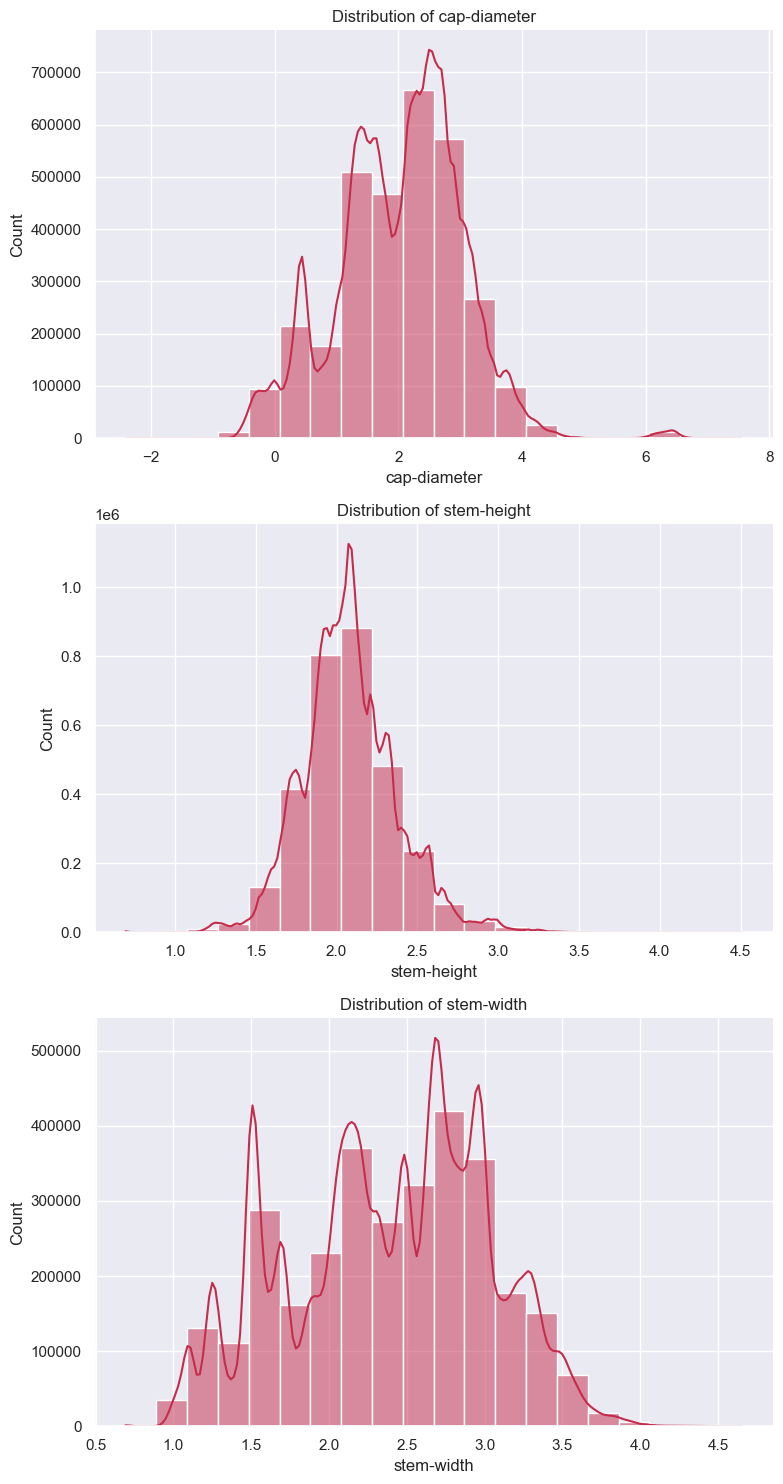

In [26]:
plt.figure(figsize=(8, 15)) 

for i, column in enumerate(numerical_columns):
    plt.subplot(3, 1, i+1)
    sns.histplot(data=df_train_cleaned, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    sns.despine()

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

## 범주형 변수 분포. Distribution of Categorical Features

### 범주의 변수의 분포 볼때 다음 사항들을 중점으로 살피면 좋은 것.
* 범주의 빈도 : 각 범주가 얼마나 자주 나타나는지 확인합니다. 가장 흔한 범주와 가장 드문 범주를 식별합니다.
* 불균형 : 심한 불균형은 모델 학습에 영향을 주기에 현저히 많거나 적인 범주에 대해서 확인합니다.
* 범주의 수 : 범주의 수가 너무 많으면 차원 축소나 범주 통합이 필요합니다.
* 희귀 범주 : 매우 적게 나타나는 범주가 있는지 확인하고 적절히 조치합니다.(희귀 범주 끼리의 하나의 클래스로 묶기 등)
* 결측값 : 위에서 결측값들을 unknown으로 제외했지만, 이 값의 비율도 따로 확인해 보는것이 좋습니다.
* 순서 : 범주형 변수의 순서가 있는지(ordinal) 없는지(nominal)확인합니다. 의미가 있는 순서라면 다른 방법을 고려해봅니다.
* 이상치 오류 : 예상치 못한 범주 및 오류값을 확인합니다.
* 전체 분포 확인


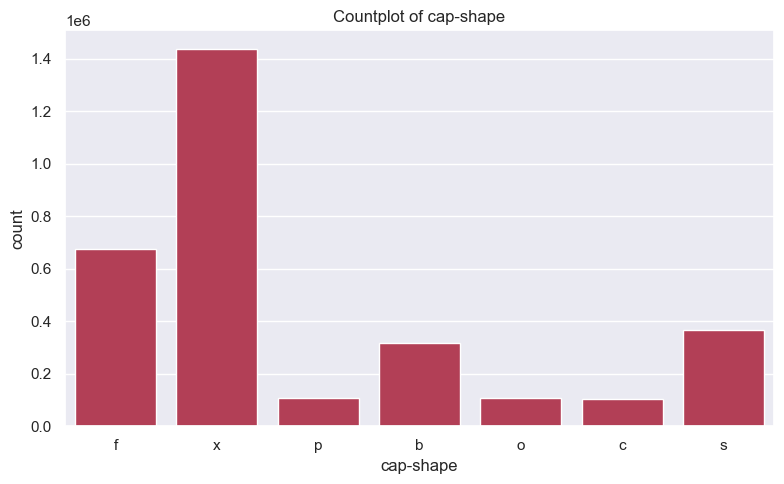

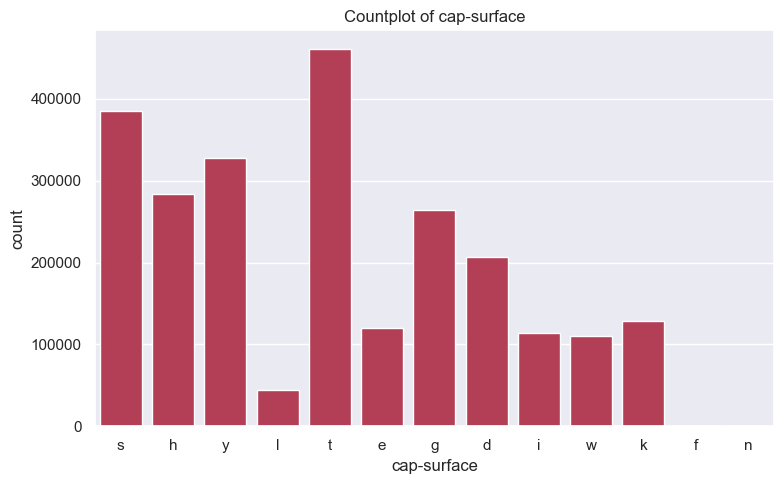

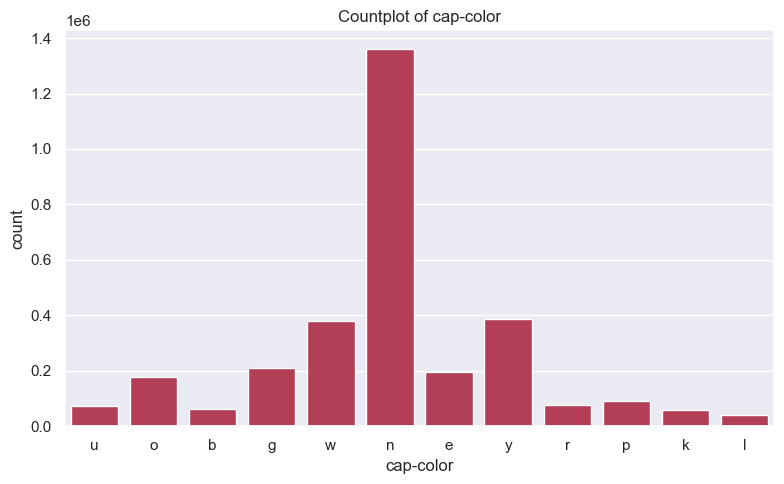

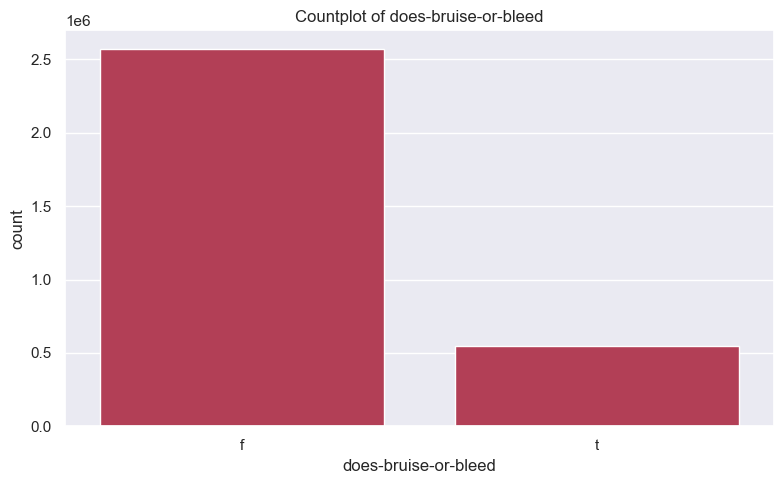

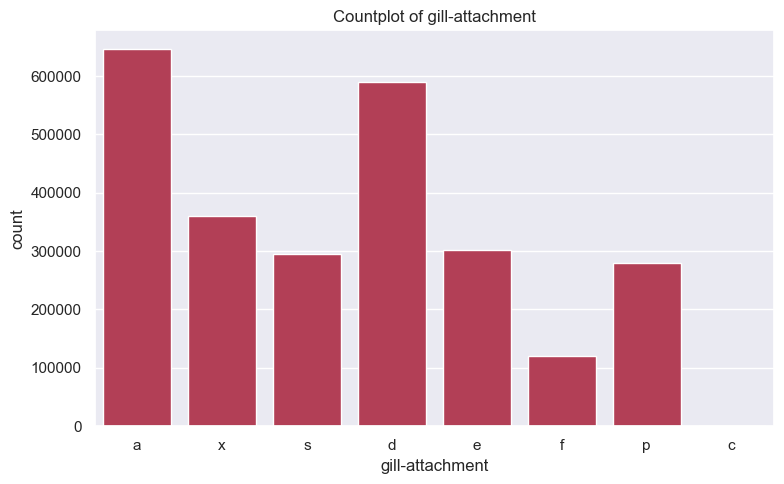

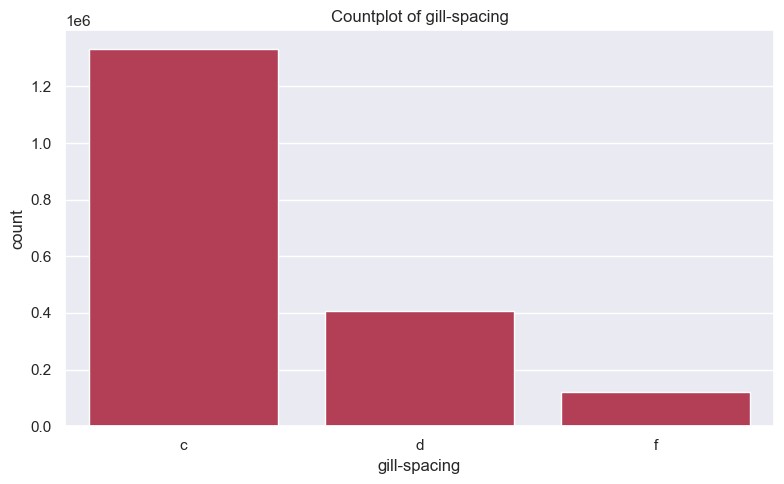

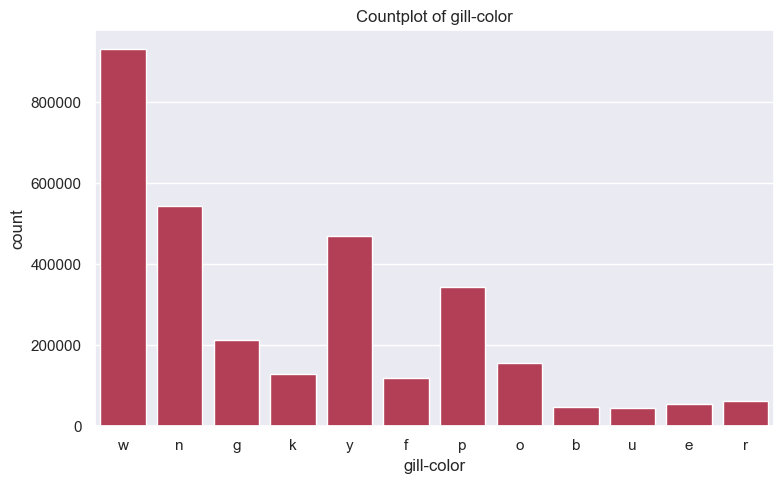

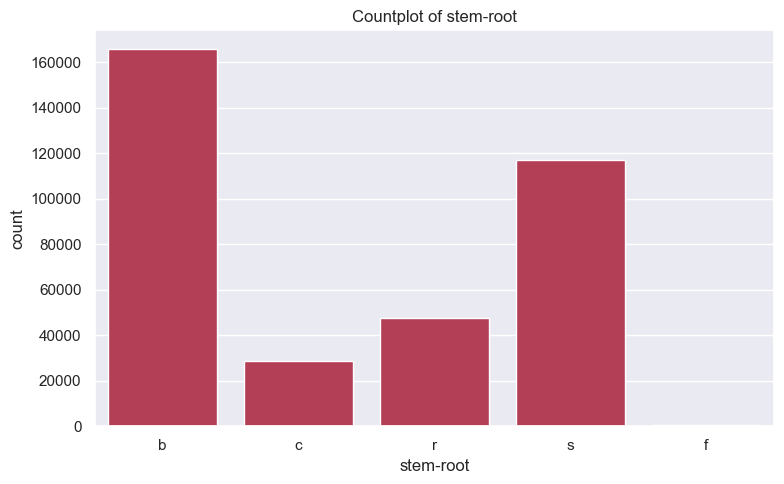

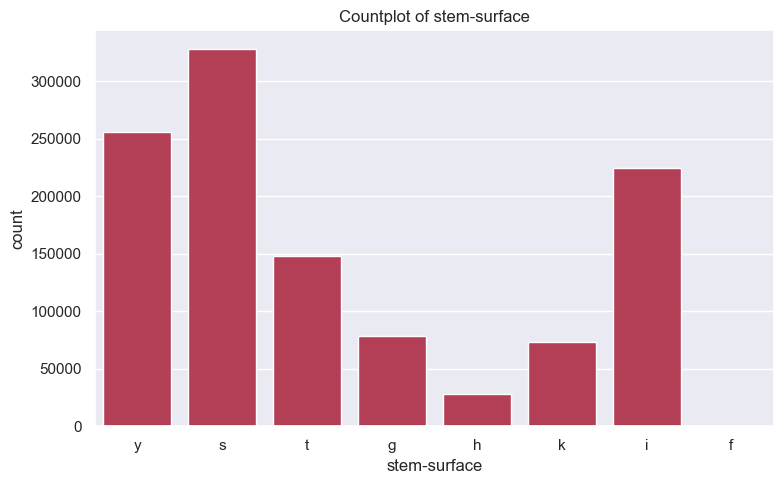

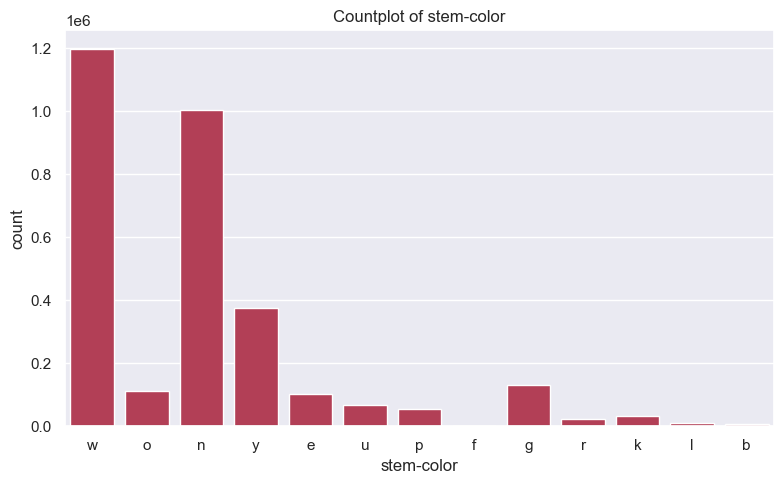

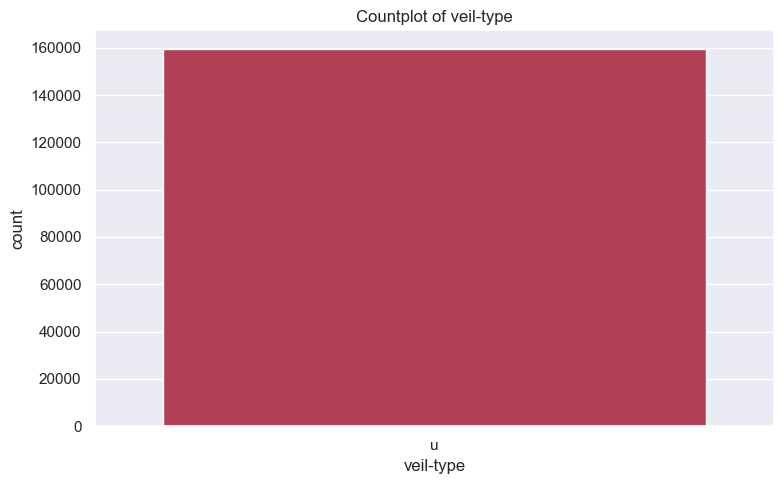

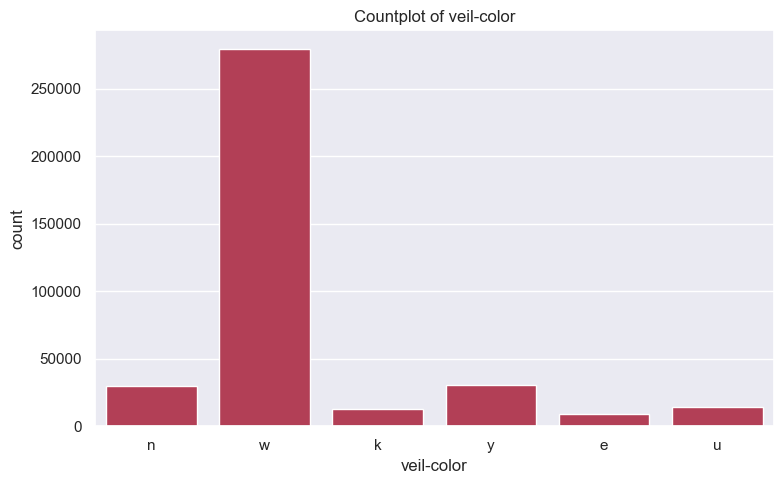

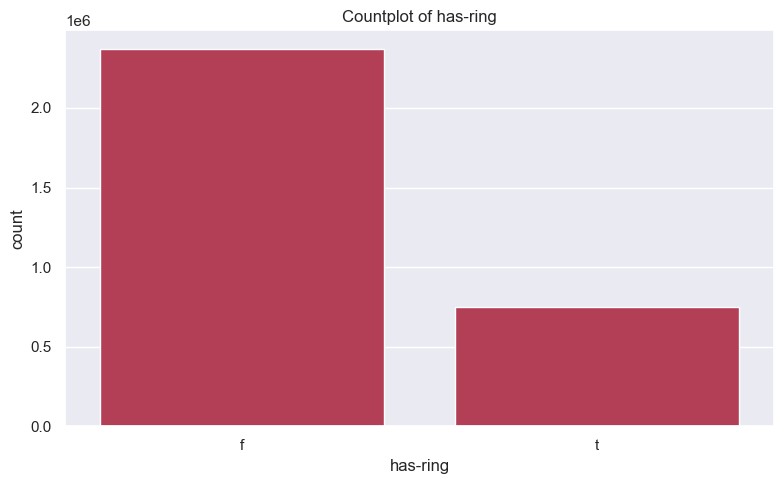

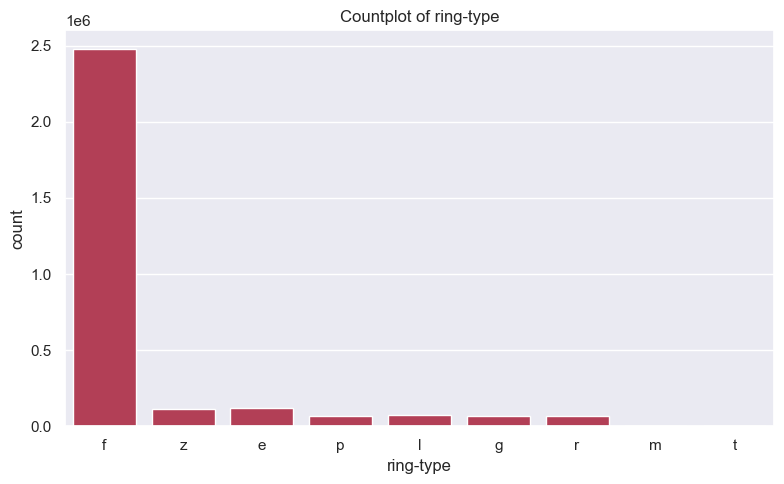

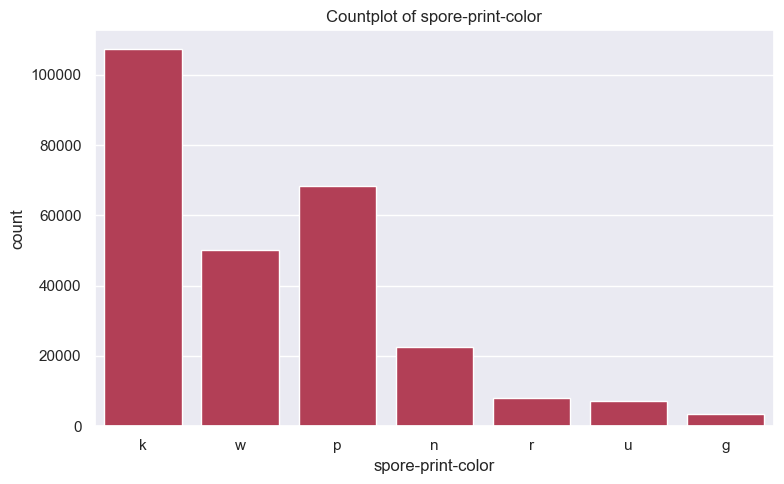

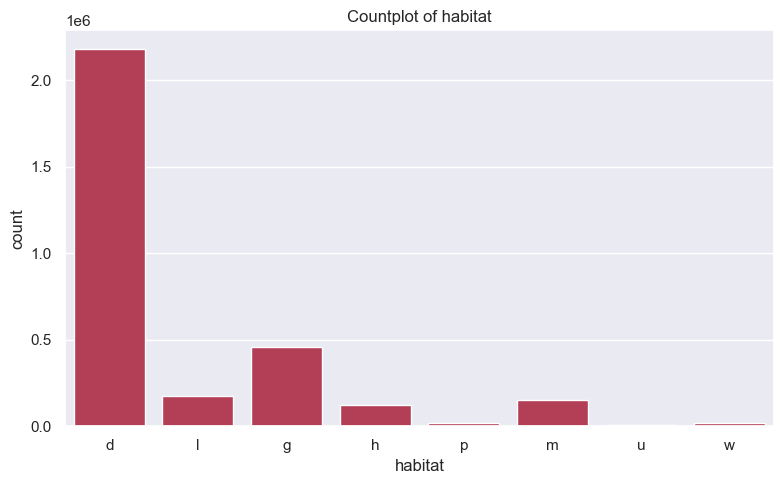

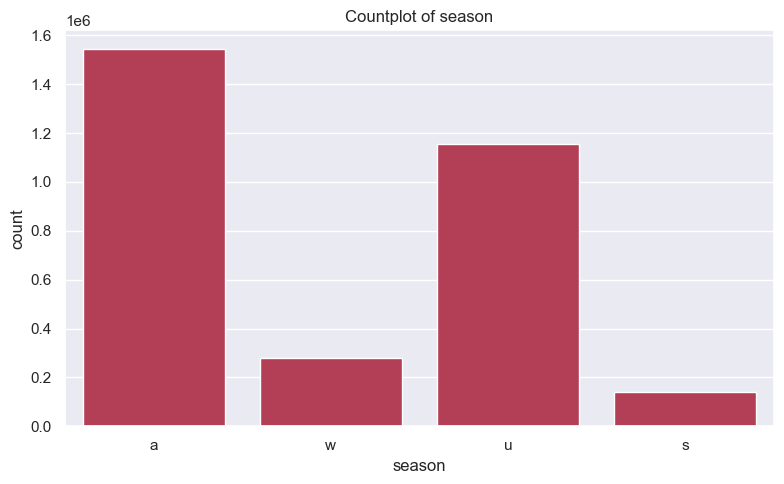

In [27]:
for column in categorical_columns:
    # Exclude "Unknown" values from the DataFrame
    filtered_data = df_train_cleaned.loc[df_train_cleaned[column] != 'Unknown']
    
    plt.figure(figsize=(8, 5))
    sns.countplot(data=filtered_data, x=column)
    plt.title(f'Countplot of {column}')
    
    plt.tight_layout()
    plt.show()


## 수치적 특성들 간의 상관관계 탐색. Exploring Correlations between Numerical Features

### pairplot visualization

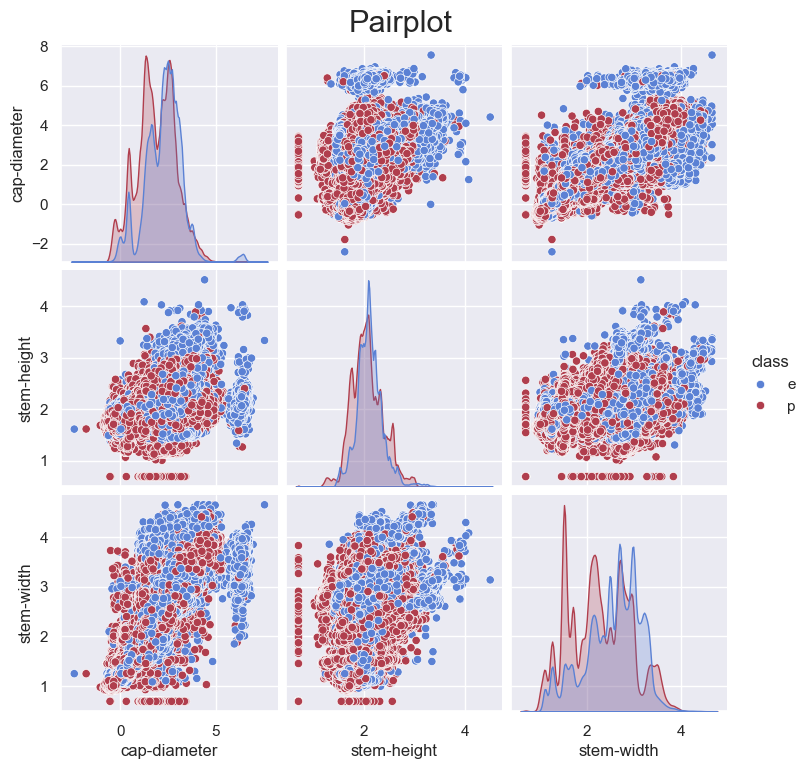

In [69]:
custom_palette = sns.color_palette(["#5b81d4", "#b03e4d"])

pairplot = sns.pairplot(df_train_cleaned, hue='class', palette=custom_palette)
pairplot.figure.suptitle('Pairplot', fontsize=22, y=1.02)
plt.show()

### violinplot visualization

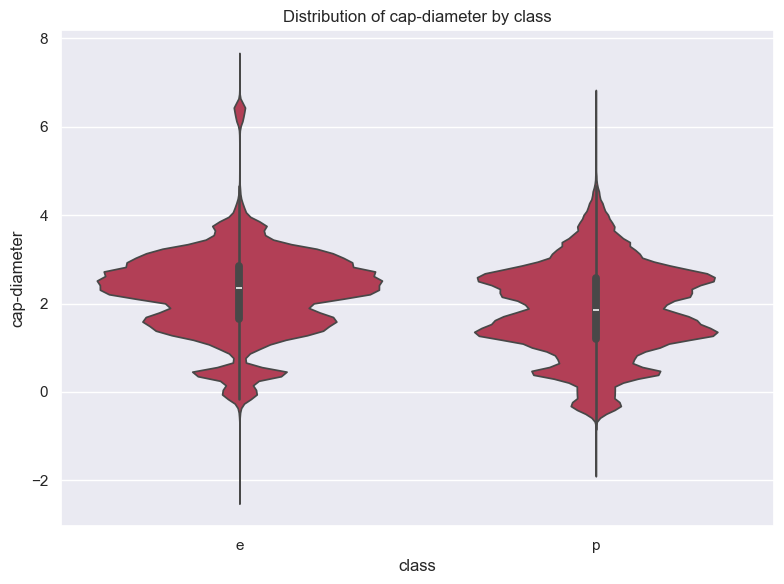

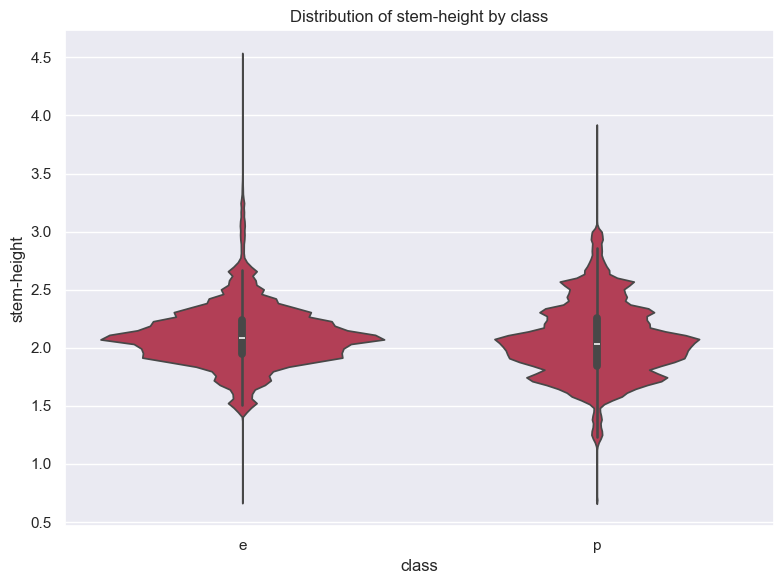

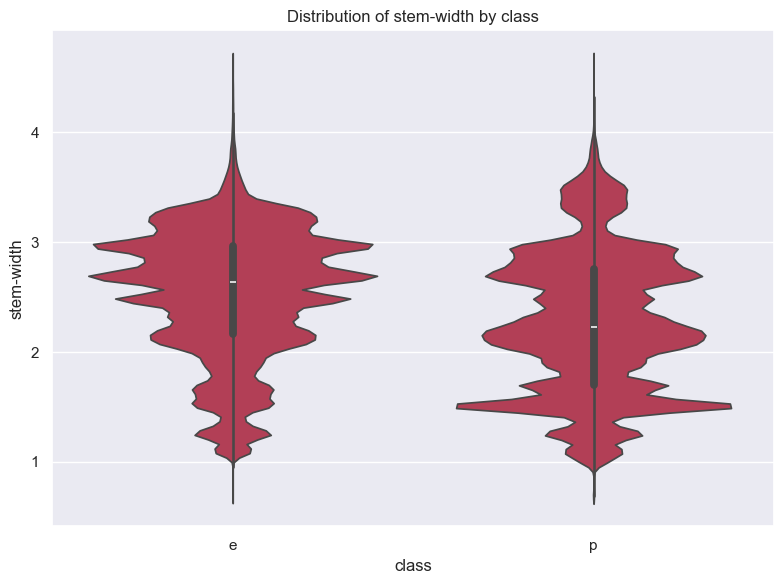

In [70]:
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df_train_cleaned, x='class', y=column) 
    plt.title(f'Distribution of {column} by class')

    plt.tight_layout()
    plt.show()

### var visualization

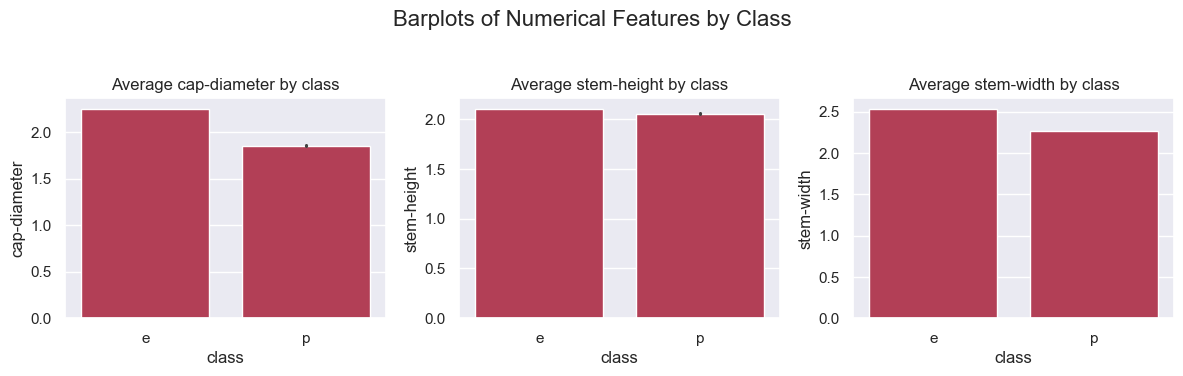

In [71]:

plt.figure(figsize=(12, 6))

for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)  # Adjust layout based on the number of columns
    sns.barplot(data=df_train_cleaned, x='class', y=column)
    plt.title(f'Average {column} by class')
    plt.tight_layout()

plt.suptitle('Barplots of Numerical Features by Class', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### 상관계수. Correlation Heatmap

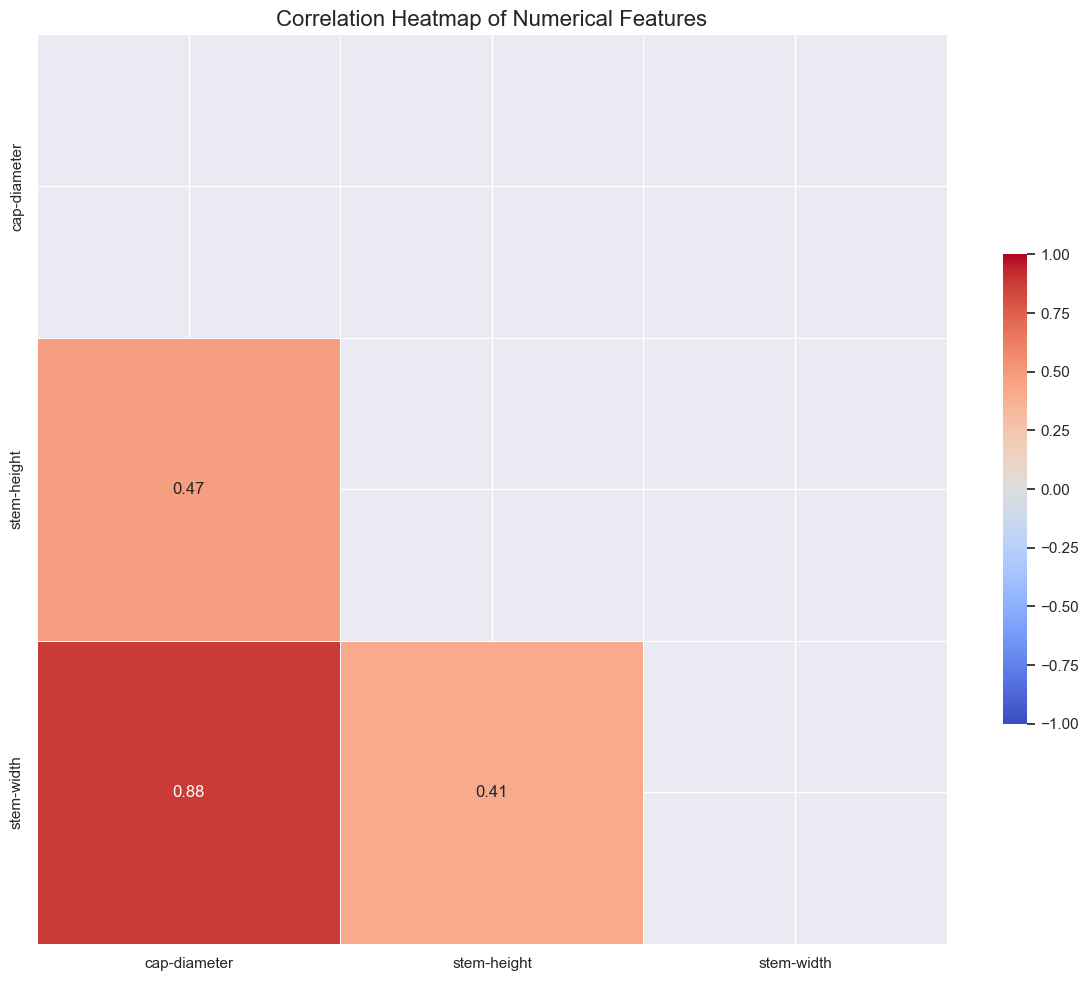

In [72]:
# Assuming df_train_cleaned is your DataFrame
# Select only numerical columns
numerical_df = df_train_cleaned.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

## 범주형 특징 간의 상관관계 탐색. Exploring Correlation between Categorical Features

### mosaic visualization

<Figure size 800x600 with 0 Axes>

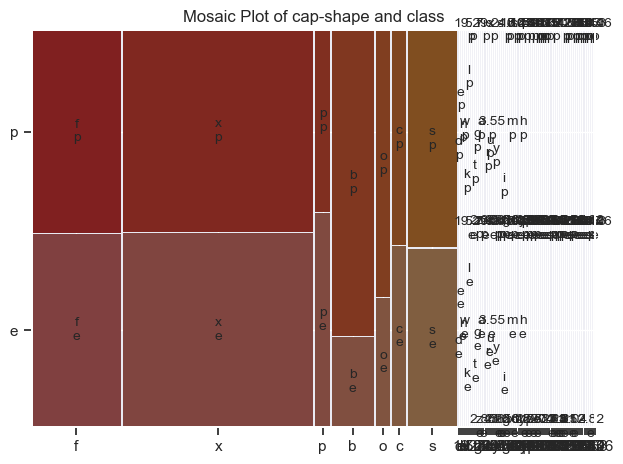

<Figure size 800x600 with 0 Axes>

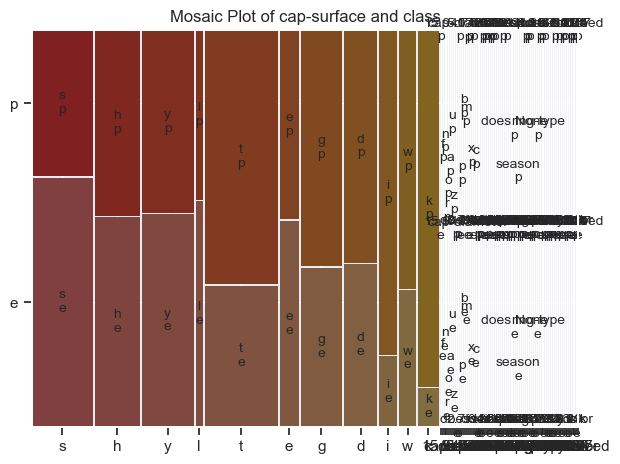

<Figure size 800x600 with 0 Axes>

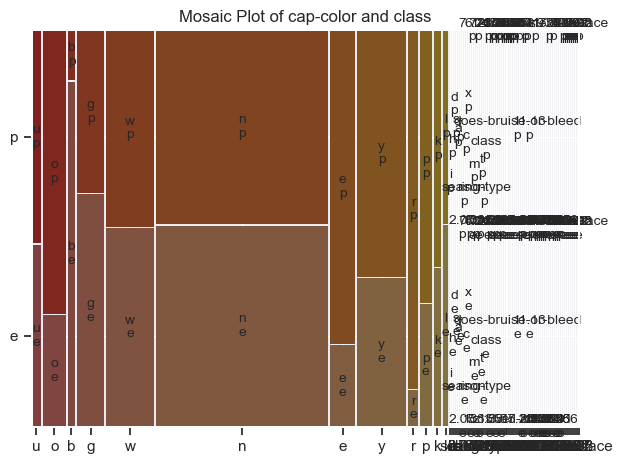

<Figure size 800x600 with 0 Axes>

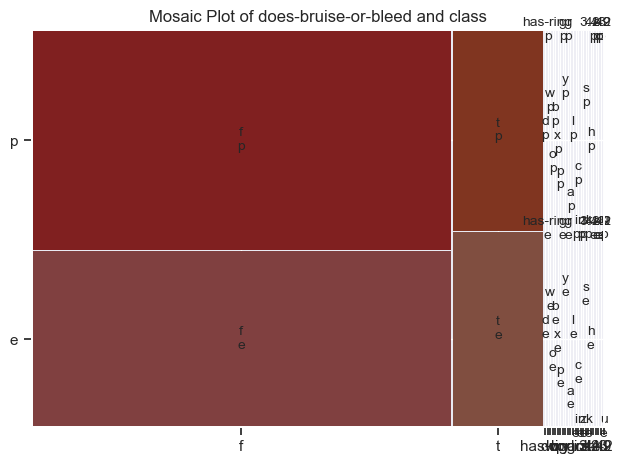

<Figure size 800x600 with 0 Axes>

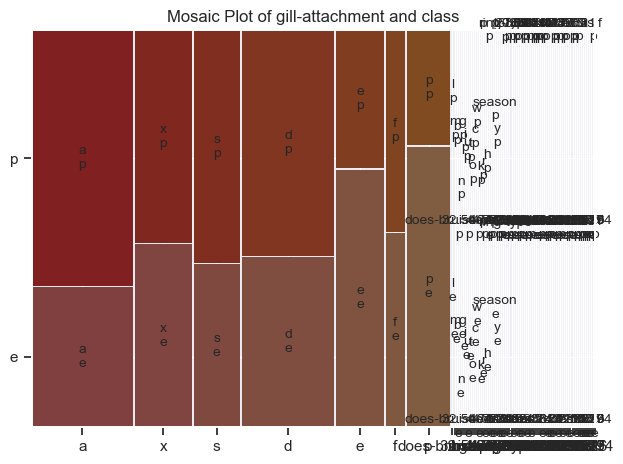

<Figure size 800x600 with 0 Axes>

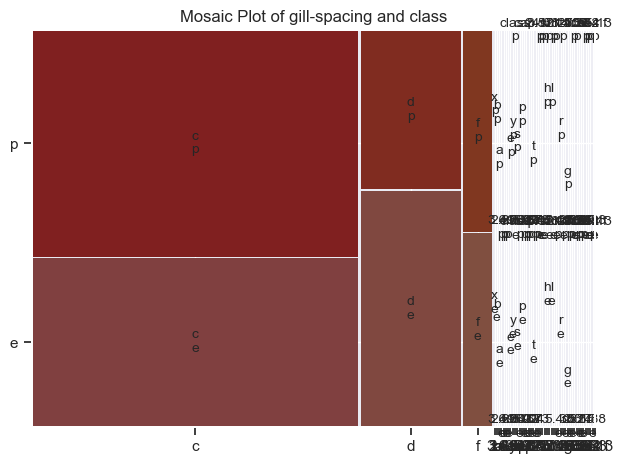

<Figure size 800x600 with 0 Axes>

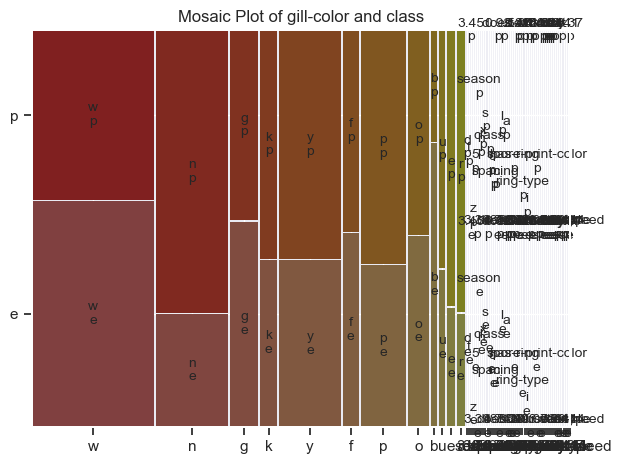

<Figure size 800x600 with 0 Axes>

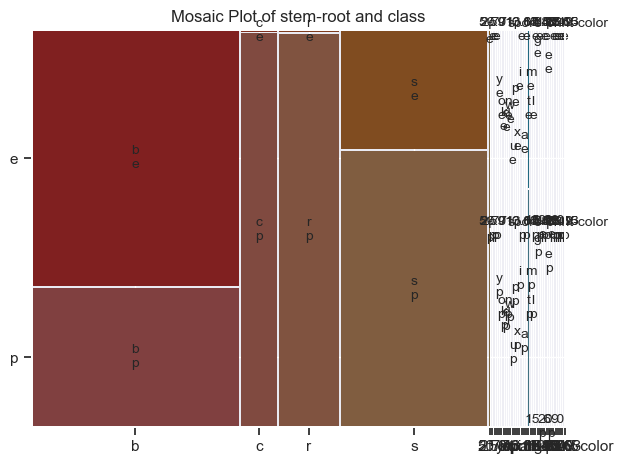

<Figure size 800x600 with 0 Axes>

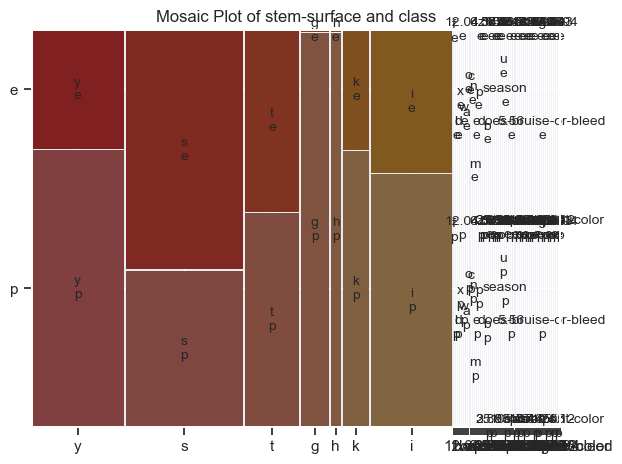

<Figure size 800x600 with 0 Axes>

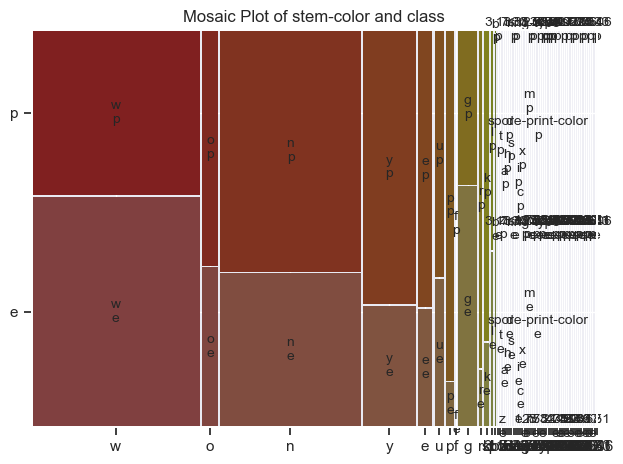

<Figure size 800x600 with 0 Axes>

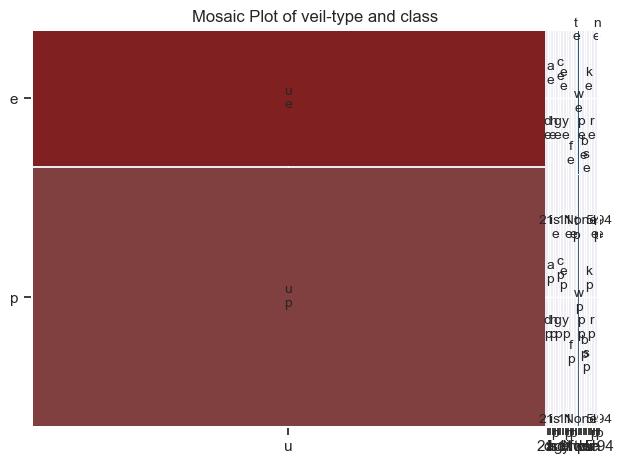

<Figure size 800x600 with 0 Axes>

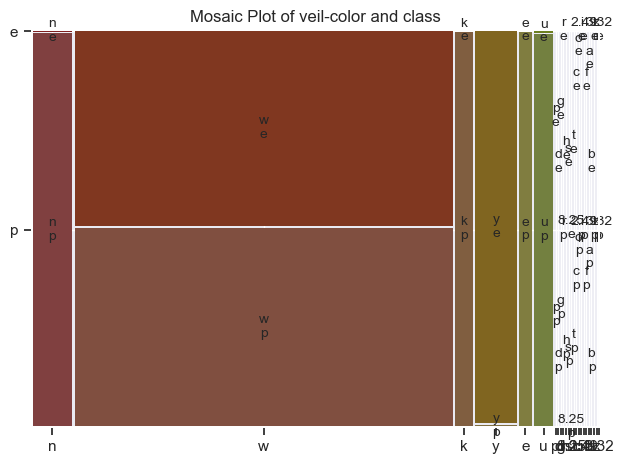

<Figure size 800x600 with 0 Axes>

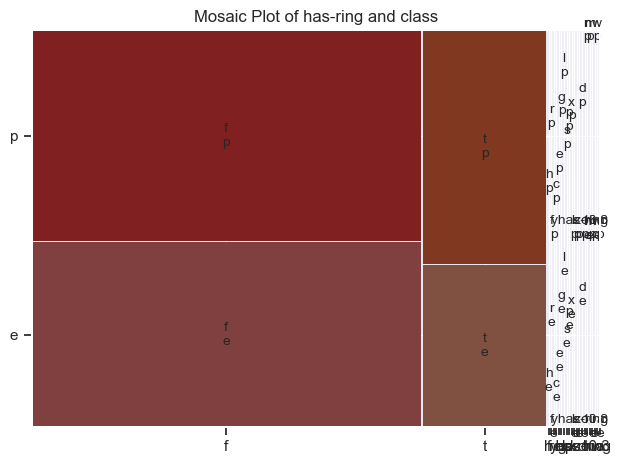

<Figure size 800x600 with 0 Axes>

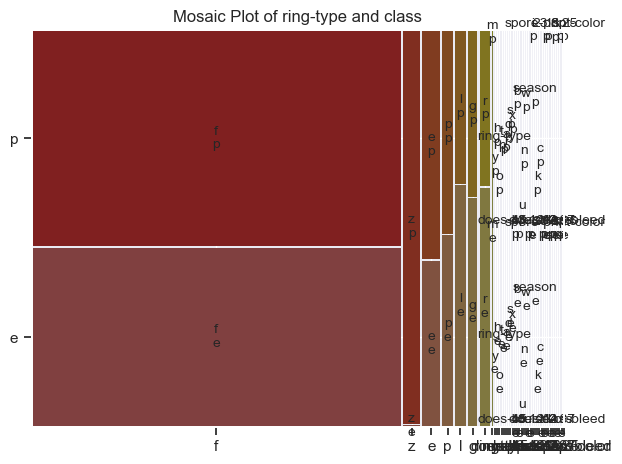

<Figure size 800x600 with 0 Axes>

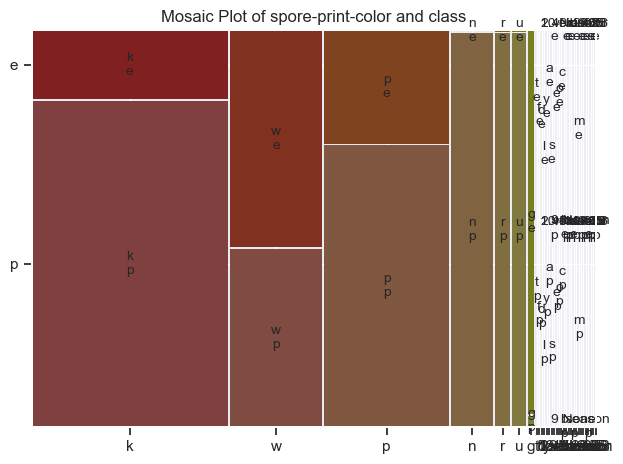

<Figure size 800x600 with 0 Axes>

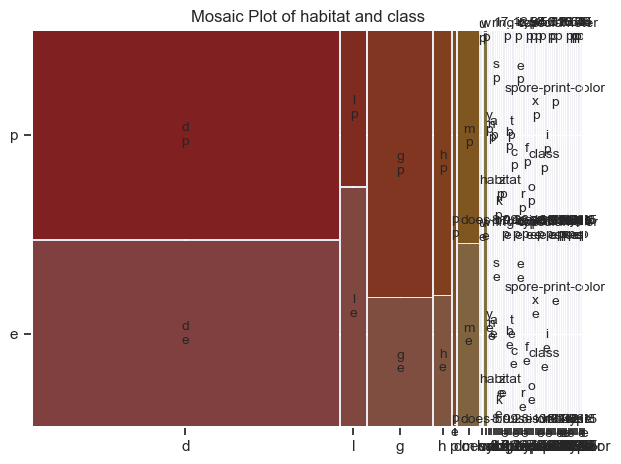

<Figure size 800x600 with 0 Axes>

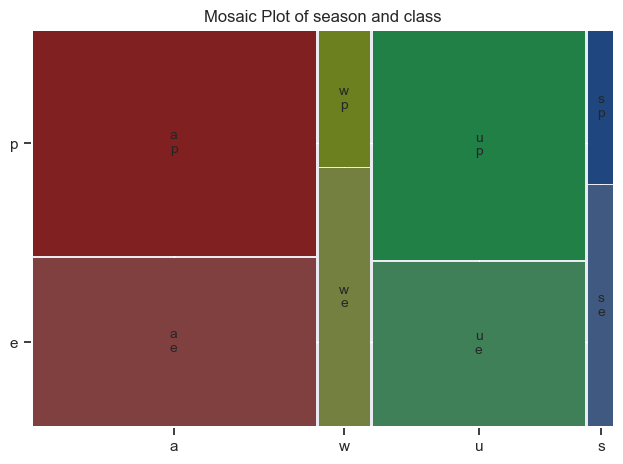

In [73]:
# Plot mosaic plots for each categorical column, excluding "Unknown" values
for column in categorical_columns:
    # Exclude "Unknown" values from the DataFrame
    filtered_data = df_train_cleaned.loc[df_train_cleaned[column] != 'Unknown']
    
    plt.figure(figsize=(8, 6))
    mosaic(filtered_data, [column, 'class'])
    plt.title(f'Mosaic Plot of {column} and class')

    plt.tight_layout()
    plt.show()

해당 시각화 내용을 보면 식용버섯과 독버섯이 서로 다른 특징을 가지고 있음을 알 수 있습니다.

예를 들어, 식용버섯은 여름과 겨울에. 독버섯은 가을과 봄에 더 발견 됩니다.

이는 버섯의 특징에 따라 식용 여부를 예측할 수 있는 정확한 모델을 만들 수 있을지도 모른다는 것을 시사합니다.

## 이상치 탐색(z-score). Exploring Outliers
앞줄로 시각화된 Z-점수 및 바이올린 그림에서 세 숫자 열 모두에 이상치가 있음을 관찰할 수 있습니다. 특히 15, 30 및 11의 Z-점수가 상당히 높아 이 값들이 평균에서 멀리 떨어져 있고 예상되는 데이터 범위 밖에 있음을 나타냅니다. 이러한 높은 Z-점수는 해당 데이터 점이 극단적인 이상치임을 시사하며, 이는 잠재적으로 데이터의 분석과 해석을 왜곡할 수 있습니다. 이상치를 제거하는 방법에는 다양한 방법이 있습니다. 사용하기로 선택한 방법은 (데이터 전처리 중) 격리 숲입니다.


In [28]:
# DataFrame의 숫자 열에 대한 Z-score 계산
z_scores = stats.zscore(df_train_cleaned[numerical_columns])

# Z-점수에 대한 기술 통계량을 생성하고 결과를 소수점 3자리로 반올림합니다
z_scores.describe().round(3)

cap-diameter  stem-height   stem-width
count   3116945.000  3116945.000  3116945.000
mean          0.000       -0.000       -0.000
std           1.000        1.000        1.000
min          -4.423       -4.766       -2.674
25%          -0.650       -0.620       -0.703
50%           0.116       -0.046        0.108
75%           0.671        0.564        0.762
max           5.488        8.364        3.577

## 타겟 변수 분포 확인

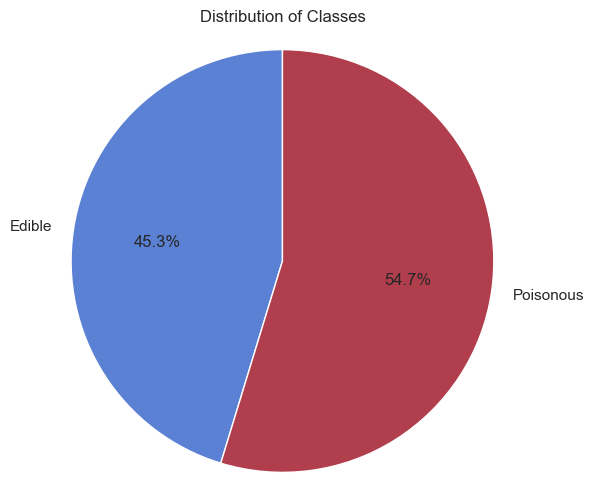

In [75]:
# Calculate counts for the pie chart and add labels
class_counts = df_train_cleaned['class'].value_counts().sort_index()
labels = ["Edible", "Poisonous"]

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=labels, colors=custom_palette,
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Preprocessing Steps Explained
LabelEncoder Initialization: 먼저 LabelEncoder 인스턴스를 생성하여 범주형 레이블(예: 'e', 'p')을 숫자 값(예: 0, 1)으로 변환하는 데 사용합니다.
Categorical Columns to 'Category' dtype: 이 변환은 메모리 사용에 효율적이며 특정 변환을 이 컬럼에 쉽게 적용할 수 있습니다.

수치 파이프라인 정의:
StandardScaler: 이 단계에서는 평균을 제거하고 단위 분산으로 스케일링하여 수치 특징을 표준화합니다.
float32로 변환: 이 단계에서는 데이터 유형을 float32로 변환하여 메모리를 절약합니다. 이는 범주 열을 '범주' dtype으로 변환하는 것과 유사합니다.

범주형 파이프라인 정의:
OrdinalEncoder: 범주형 특징을 정수로 인코딩합니다. handle_unknown='use_encoded_value'를 사용하면 변환 중에 보이지 않는 범주에 특정 값(예: -1)을 할당하여 처리할 수 있습니다.
Column Transformer: 수치 파이프라인과 범주형 파이프라인을 하나의 변환 단계로 결합합니다.

변환 적용: fit_transform: 전처리기를 훈련 데이터에 적합시키고 변환을 적용합니다. transform: 동일한 변환을 테스트 데이터에 적용합니다. fit은 데이터 유출을 피하기 위해 테스트 데이터에 호출되지 않습니다.

In [76]:
# Nan을 못읽어서 위 코드 사용불가.
# 
# # Initialize LabelEncoder
# label_encoder = LabelEncoder()
# 
# # Fit and transform the target variable
# train_encoded_target = label_encoder.fit_transform(df_train_cleaned[['class']])
# 
# # 범주형 열을 '범주' dtype으로 변환합니다
# df_train_cleaned[categorical_columns] = df_train_cleaned[categorical_columns].astype('category')
# df_test_cleaned[categorical_columns] = df_test_cleaned[categorical_columns].astype('category')
# 
# # 수치 파이프라인 정의
# numerical_pipeline = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('convert_to_float32', FunctionTransformer(lambda x: x.astype(np.float32)))
# ])
# 
# # 범주형 파이프라인 정의
# categorical_pipeline = Pipeline(steps=[
#     ('ordinal', OrdinalEncoder(dtype=np.int32, handle_unknown='use_encoded_value', unknown_value=-1))
# ])
# 
# # 수치 파이프라인과 범주형 파이프라인을 모두 결합합니다
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_pipeline, numerical_columns),
#         ('cat', categorical_pipeline, categorical_columns)
#     ]
# )
# 
# # 파이프라인을 사용하여 변환 적용
# df_train_preprocessed = preprocessor.fit_transform(df_train_cleaned)
# df_test_preprocessed = preprocessor.transform(df_test_cleaned)

ValueError: There are missing values in features [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]. For OrdinalEncoder to encode missing values with dtype: <class 'numpy.int32'>, set encoded_missing_value to a non-nan value, or set dtype to a float

In [37]:
df_train_cleaned[categorical_columns].astype('category')

cap-shape cap-surface cap-color does-bruise-or-bleed gill-attachment  \
0               f           s         u                    f               a   
1               x           h         o                    f               a   
2               f           s         b                    f               x   
3               f           y         g                    f               s   
4               x           l         w                    f               d   
...           ...         ...       ...                  ...             ...   
3116940         f         NaN         n                    t             NaN   
3116941         s         NaN         w                    t               d   
3116942         x           e         e                    f               a   
3116943         p           i         n                    t               e   
3116944         x           s         g                    f               d   

        gill-spacing gill-color stem-root stem-surface stem-color veil-type  \
0                  c          w       NaN          NaN          w       NaN   
1                  c          n       NaN            y          o       NaN   
2                  c          w       NaN            s          n       NaN   
3                NaN          g       NaN          NaN          w       NaN   
4                NaN          w       NaN          NaN          w       NaN   
...              ...        ...       ...          ...        ...       ...   
3116940          NaN          w         b          NaN          w         u   
3116941            c          p       NaN          NaN          w       NaN   
3116942          NaN          w       NaN          NaN          y       NaN   
3116943          NaN          p       NaN            y          w       NaN   
3116944            c          w       NaN          NaN          w       NaN   

        veil-color has-ring ring-type spore-print-color habitat season  
0              NaN        f         f               NaN       d      a  
1              NaN        t         z               NaN       d      w  
2              NaN        f         f               NaN       l      w  
3              NaN        f         f               NaN       d      u  
4              NaN        f         f               NaN       g      a  
...            ...      ...       ...               ...     ...    ...  
3116940          w        t         g               NaN       d      u  
3116941        NaN        f         f               NaN       d      u  
3116942          w        t         z               NaN       d      a  
3116943        NaN        t         p               NaN       d      u  
3116944        NaN        f         f               NaN       g      u  

[3116945 rows x 17 columns]

### 이 방식을 사용하면 NaN 값을 그대로 유지하면서 OrdinalEncoder를 적용

In [38]:
df_train_cleaned

class  cap-diameter cap-shape cap-surface cap-color  \
0           e      2.815961         f           s         u   
1           p      1.797590         x           h         o   
2           e      2.436300         f           s         b   
3           e      1.589007         f           y         g   
4           e      2.175561         x           l         w   
...       ...           ...       ...         ...       ...   
3116940     e      2.905522         f         NaN         n   
3116941     e      3.173059         s         NaN         w   
3116942     p      2.624611         x           e         e   
3116943     e      2.933976         p           i         n   
3116944     p      1.332140         x           s         g   

        does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                          f               a            c          w   
1                          f               a            c          n   
2                          f               x            c          w   
3                          f               s          NaN          g   
4                          f               d          NaN          w   
...                      ...             ...          ...        ...   
3116940                    t             NaN          NaN          w   
3116941                    t               d            c          p   
3116942                    f               a          NaN          w   
3116943                    t               e          NaN          p   
3116944                    f               d            c          w   

         stem-height  ...  stem-root stem-surface stem-color veil-type  \
0           1.873339  ...        NaN          NaN          w       NaN   
1           1.915451  ...        NaN            y          o       NaN   
2           2.180417  ...        NaN            s          n       NaN   
3           1.818077  ...        NaN          NaN          w       NaN   
4           1.680828  ...        NaN          NaN          w       NaN   
...              ...  ...        ...          ...        ...       ...   
3116940     2.649008  ...          b          NaN          w         u   
3116941     2.157559  ...        NaN          NaN          w       NaN   
3116942     2.443216  ...        NaN          NaN          y       NaN   
3116943     2.409644  ...        NaN            y          w       NaN   
3116944     1.572774  ...        NaN          NaN          w       NaN   

        veil-color has-ring ring-type spore-print-color habitat season  
0              NaN        f         f               NaN       d      a  
1              NaN        t         z               NaN       d      w  
2              NaN        f         f               NaN       l      w  
3              NaN        f         f               NaN       d      u  
4              NaN        f         f               NaN       g      a  
...            ...      ...       ...               ...     ...    ...  
3116940          w        t         g               NaN       d      u  
3116941        NaN        f         f               NaN       d      u  
3116942          w        t         z               NaN       d      a  
3116943        NaN        t         p               NaN       d      u  
3116944        NaN        f         f               NaN       g      u  

[3116945 rows x 21 columns]

In [29]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
train_encoded_target = label_encoder.fit_transform(df_train_cleaned[['class']])

# 범주형 열을 '범주' dtype으로 변환합니다
df_train_cleaned[categorical_columns] = df_train_cleaned[categorical_columns].astype('category')
df_test_cleaned[categorical_columns] = df_test_cleaned[categorical_columns].astype('category')

# 수치 파이프라인 정의
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('convert_to_float32', FunctionTransformer(lambda x: x.astype(np.float32)))
])

# 범주형 파이프라인 정의 (NaN 유지)
categorical_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(dtype=np.float32, handle_unknown='use_encoded_value', unknown_value=-1, encoded_missing_value=np.nan))
])

# 수치 파이프라인과 범주형 파이프라인을 모두 결합합니다
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_columns),
        ('cat', categorical_pipeline, categorical_columns)
    ]
)

# 파이프라인을 사용하여 변환 적용
df_train_preprocessed = preprocessor.fit_transform(df_train_cleaned)
df_test_preprocessed = preprocessor.transform(df_test_cleaned)

In [41]:
df_train_preprocessed

array([[ 0.7781095 , -0.7037284 ,  0.7399635 , ...,         nan,
         1.        ,  0.        ],
       [-0.23467375, -0.5587885 , -0.39372948, ...,         nan,
         1.        ,  3.        ],
       [ 0.40053114,  0.35317677,  0.14510298, ...,         nan,
         4.        ,  3.        ],
       ...,
       [ 0.5878089 ,  1.257681  ,  0.28795868, ...,         nan,
         1.        ,  0.        ],
       [ 0.8954773 ,  1.1421323 ,  0.942445  , ...,         nan,
         1.        ,  2.        ],
       [-0.6975708 , -1.7382188 , -0.16696873, ...,         nan,
         2.        ,  2.        ]], dtype=float32)

## 이상치탐지(isolationforest)

In [42]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# NaN 값을 처리하기 위한 imputer 생성
imputer = SimpleImputer(strategy='mean')

# NaN 값을 평균으로 대체
df_train_preprocessed_imputed = imputer.fit_transform(df_train_preprocessed)

# 이상치 탐지를 위해 격리 포레스트 적용
isolation_forest = IsolationForest(contamination=0.02, random_state=rs)
outlier_labels = isolation_forest.fit_predict(df_train_preprocessed_imputed)

# 원본 데이터에서 이상치를 NaN으로 변경
df_train_preprocessed_with_nan = df_train_preprocessed.copy()
df_train_preprocessed_with_nan[outlier_labels == -1] = np.nan

# 타겟 변수에도 동일하게 적용
train_encoded_target_with_nan = train_encoded_target.copy()
train_encoded_target_with_nan[outlier_labels == -1] = np.nan

print("Shape of preprocessed training data:", df_train_preprocessed_with_nan.shape)
print("Number of NaN values in preprocessed data:", np.isnan(df_train_preprocessed_with_nan).sum())
print("Number of NaN values in target:", np.isnan(train_encoded_target_with_nan).sum())

ValueError: cannot convert float NaN to integer

In [50]:
# 이상치 탐지를 위해 격리 포레스트 적용
isolation_forest = IsolationForest(contamination=0.02, random_state=rs)
outlier_labels = isolation_forest.fit_predict(df_train_preprocessed)

# 이상치 필터링
non_outliers_mask = outlier_labels != -1
df_train_preprocessed = df_train_preprocessed[non_outliers_mask]
train_encoded_target = train_encoded_target[non_outliers_mask]

ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# 모델링 및 하이퍼파라미터 최적화

## 데이터 스플릿

In [31]:
# df_train_preprocessed = preprocessor.fit_transform(df_train_cleaned)
# df_test_preprocessed = preprocessor.transform(df_test_cleaned)
# train_encoded_target

# 별도 형상(X) 및 대상 변수(y)
X = df_train_preprocessed
# y = train_encoded_target
y = train_encoded_target
# 데이터를 교육 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

## 베스트 파라미터 찾기

### XGBClassifier + GridSearchCV

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef

## Tuning Hyperparameters

# GPU를 사용하는 XGBClassifier 정의
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='gpu_hist', gpu_id=0)

# 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 5, 7, 14],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.9],
    'colsample_bytree': [0.4, 0.6, 0.8]
}

# MCC를 위한 커스텀 스코어 함수 정의
def mcc_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return matthews_corrcoef(y, y_pred)

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring=mcc_scorer, 
                           cv=5, 
                           verbose=1, 
                           n_jobs=1)  # GPU 사용 시 n_jobs=1로 설정

# GridSearchCV 학습
grid_search.fit(X_train, y_train)

# 최적 파라미터와 최고 점수 출력
print("Best Parameters:\n", grid_search.best_params_)
print("Best MCC Score:\n", grid_search.best_score_)

# 테스트 세트에 대한 예측
y_pred = grid_search.best_estimator_.predict(X_test)

# 모델 평가
print("Test MCC Score:", matthews_corrcoef(y_test, y_pred))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters:
 {'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 14, 'min_child_weight': 10, 'n_estimators': 200, 'subsample': 0.9}
Best MCC Score:
 0.9845807090743618
Test MCC Score: 0.9845897038595361


### XGBoost + RandomizedSearchCV

In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import matthews_corrcoef
from scipy.stats import randint, uniform

## Tuning Hyperparameters

# GPU를 사용하는 XGBClassifier 정의
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='gpu_hist', gpu_id=0)

# 파라미터 분포 정의
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.19),  # 0.01 to 0.2
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 11),
    'subsample': uniform(0.5, 0.4),  # 0.5 to 0.9
    'colsample_bytree': uniform(0.4, 0.4)  # 0.4 to 0.8
}

# MCC를 위한 커스텀 스코어 함수 정의
def mcc_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return matthews_corrcoef(y, y_pred)

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, 
                                   n_iter=5,  # 탐색할 파라미터 조합의 수
                                   scoring=mcc_scorer, 
                                   cv=3,  # 교차 검증 폴드 수
                                   verbose=1, 
                                   n_jobs=1,  # GPU 사용 시 1로 설정
                                   random_state=42)  # 재현성을 위한 랜덤 시드

# RandomizedSearchCV 학습
random_search.fit(X_train, y_train)

# 최적 파라미터와 최고 점수 출력
print("Best Parameters:\n", random_search.best_params_)
print("Best MCC Score:\n", random_search.best_score_)

# 테스트 세트에 대한 예측
y_pred = random_search.best_estimator_.predict(X_test)

# 모델 평가
print("Test MCC Score:", matthews_corrcoef(y_test, y_pred))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters:
 {'colsample_bytree': 0.5783331011414365, 'learning_rate': 0.028995234005420548, 'max_depth': 13, 'min_child_weight': 8, 'n_estimators': 472, 'subsample': 0.7404460046972835}
Best MCC Score:
 0.984424877527411
Test MCC Score: 0.9844932830340203


### 주기적으로 업데이트 가능한 Catboost + optuna 베스트 파라미터 버전1
* 맨처음부터 갱신하기

In [ ]:
import optuna
from optuna.samplers import TPESampler
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
import numpy as np
import logging
import sys

# Optuna 로깅 설정
optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
optuna.logging.set_verbosity(optuna.logging.INFO)

# 초기 파라미터 범위 정의 (확장된 범위)
param_ranges = {
    'iterations': (100, 2000),
    'learning_rate': (1e-3, 0.5),
    'depth': (3, 10),
    'l2_leaf_reg': (1e-3, 100),
}

def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', param_ranges['iterations'][0], param_ranges['iterations'][1]),
        'learning_rate': trial.suggest_loguniform('learning_rate', param_ranges['learning_rate'][0], param_ranges['learning_rate'][1]),
        'depth': trial.suggest_int('depth', param_ranges['depth'][0], param_ranges['depth'][1]),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', param_ranges['l2_leaf_reg'][0], param_ranges['l2_leaf_reg'][1]),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bernoulli', 'MVS']),
        'task_type': 'GPU',
        'devices': '0'
    }

    model = CatBoostClassifier(**param, verbose=0)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=0)

    y_pred = model.predict(X_test)
    mcc = matthews_corrcoef(y_test, y_pred)
    return mcc

def update_param_ranges(study):
    best_params = study.best_params
    global param_ranges
    
    for param, (min_val, max_val) in param_ranges.items():
        if param in best_params:
            best_val = best_params[param]
            new_min = max(min_val, best_val * 0.7)
            new_max = min(max_val, best_val * 1.5)
            param_ranges[param] = (new_min, new_max)

    print("업데이트된 파라미터 범위:")
    for param, (min_val, max_val) in param_ranges.items():
        print(f"    {param}: ({min_val}, {max_val})")

def print_current_best_params(study):
    print("\n현재 최적의 파라미터:")
    for key, value in study.best_params.items():
        print(f"    {key}: {value}")
    print(f"현재 최고 MCC 점수: {study.best_value:.4f}")

# 메인 최적화 루프
study = optuna.create_study(direction='maximize', sampler=TPESampler(n_startup_trials=20, n_ei_candidates=24))

n_trials = 600
no_improvement_threshold = max(20, n_trials // 20)
print(f"성능 향상 없음 기준 횟수: {no_improvement_threshold}")

no_improvement_count = 0
best_value = float('-inf')

for i in range(n_trials):
    trial = study.ask()
    value = objective(trial)
    study.tell(trial, value)
    
    if value > best_value:
        best_value = value
        no_improvement_count = 0
    else:
        no_improvement_count += 1
    
    print(f"시도 {i+1}/{n_trials} 완료:")
    print(f"  현재 값: {value:.4f}")
    print(f"  최고 값: {best_value:.4f}")
    print(f"  성능 향상 없는 연속 시도 횟수: {no_improvement_count}/{no_improvement_threshold}")
    
    # 매 시도마다 현재까지의 최적 파라미터 출력
    print_current_best_params(study)
    
    if no_improvement_count >= no_improvement_threshold:
        print(f"\n{no_improvement_threshold}번 연속 성능 향상 없음. 파라미터 범위를 업데이트합니다.")
        update_param_ranges(study)
        no_improvement_count = 0
    
    print()

print('최종 최적의 파라미터:')
for key, value in study.best_params.items():
    print(f'    {key}: {value}')

print(f'최종 최고 MCC 점수: {study.best_value:.4f}')

# 최적의 파라미터로 최종 모델 학습
best_params = study.best_params
best_params['task_type'] = 'GPU'
best_params['devices'] = '0'

final_model = CatBoostClassifier(**best_params, verbose=0)
final_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=0)

# 최종 모델 평가
y_pred = final_model.predict(X_test)
final_mcc = matthews_corrcoef(y_test, y_pred)
print(f'최종 모델 MCC 점수: {final_mcc:.4f}')

### 주기적으로 업데이트 가능한 Catboost + optuna 베스트 파라미터 버전2
* 최근에 얻은 최적의 파라미터를 기본으로하여.

In [ ]:
import optuna
from optuna.samplers import TPESampler
from catboost import CatBoostClassifier
from sklearn.metrics import matthews_corrcoef
import numpy as np

# 이전에 얻은 최적의 파라미터
previous_best_params = {
    'iterations': 1844,
    'learning_rate': 0.08805120861149476,
    'depth': 10,
    'l2_leaf_reg': 7.620523153558266,
    'bootstrap_type': 'Bernoulli'
}

# 초기 파라미터 범위 정의 (이전 최적값 주변으로 설정)
param_ranges = {
    'iterations': (max(100, int(previous_best_params['iterations'] * 0.8)), 
                   min(3000, int(previous_best_params['iterations'] * 1.2))),
    'learning_rate': (max(1e-3, previous_best_params['learning_rate'] * 0.5), 
                      min(0.5, previous_best_params['learning_rate'] * 1.5)),
    'depth': (max(3, previous_best_params['depth'] - 2), 
              min(12, previous_best_params['depth'] + 2)),
    'l2_leaf_reg': (max(1e-3, previous_best_params['l2_leaf_reg'] * 0.5), 
                    min(100, previous_best_params['l2_leaf_reg'] * 1.5)),
}

def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', param_ranges['iterations'][0], param_ranges['iterations'][1]),
        'learning_rate': trial.suggest_loguniform('learning_rate', param_ranges['learning_rate'][0], param_ranges['learning_rate'][1]),
        'depth': trial.suggest_int('depth', param_ranges['depth'][0], param_ranges['depth'][1]),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', param_ranges['l2_leaf_reg'][0], param_ranges['l2_leaf_reg'][1]),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bernoulli', 'MVS']),
        'task_type': 'GPU',
        'devices': '0'
    }

    model = CatBoostClassifier(**param, verbose=0)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose=0)

    y_pred = model.predict(X_test)
    mcc = matthews_corrcoef(y_test, y_pred)
    return mcc

def update_param_ranges(study):
    best_params = study.best_params
    global param_ranges
    
    for param, (min_val, max_val) in param_ranges.items():
        if param in best_params:
            best_val = best_params[param]
            new_min = max(min_val, best_val * 0.9)
            new_max = min(max_val, best_val * 1.1)
            param_ranges[param] = (new_min, new_max)

    print("업데이트된 파라미터 범위:")
    for param, (min_val, max_val) in param_ranges.items():
        print(f"    {param}: ({min_val}, {max_val})")

def print_current_best_params(study):
    print("\n현재 최적의 파라미터:")
    for key, value in study.best_params.items():
        print(f"    {key}: {value}")
    print(f"현재 최고 MCC 점수: {study.best_value:.4f}")

# 메인 최적화 루프
study = optuna.create_study(direction='maximize', sampler=TPESampler(n_startup_trials=10, n_ei_candidates=24))

# 이전 최적 파라미터를 첫 번째 시도로 추가
study.enqueue_trial(previous_best_params)

n_trials = 300  # 추가 시도 횟수
quick_update_threshold = 5
print(f"빠른 업데이트 기준 횟수: {quick_update_threshold}")

no_improvement_count = 0
best_value = float('-inf')

for i in range(n_trials):
    trial = study.ask()
    value = objective(trial)
    study.tell(trial, value)
    
    if value > best_value:
        best_value = value
        no_improvement_count = 0
    else:
        no_improvement_count += 1
    
    print(f"시도 {i+1}/{n_trials} 완료:")
    print(f"  현재 값: {value:.4f}")
    print(f"  최고 값: {best_value:.4f}")
    print(f"  성능 향상 없는 연속 시도 횟수: {no_improvement_count}/{quick_update_threshold}")
    
    print_current_best_params(study)
    
    if no_improvement_count >= quick_update_threshold:
        print(f"\n{quick_update_threshold}번 연속 성능 향상 없음. 파라미터 범위를 업데이트합니다.")
        update_param_ranges(study)
        no_improvement_count = 0
    
    print()

print('최종 최적의 파라미터:')
for key, value in study.best_params.items():
    print(f'    {key}: {value}')

print(f'최종 최고 MCC 점수: {study.best_value:.4f}')

# 최적의 파라미터로 최종 모델 학습
best_params = study.best_params
best_params['task_type'] = 'GPU'
best_params['devices'] = '0'

final_model = CatBoostClassifier(**best_params, verbose=0)
final_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose=0)

# 최종 모델 평가
y_pred = final_model.predict(X_test)
final_mcc = matthews_corrcoef(y_test, y_pred)
print(f'최종 모델 MCC 점수: {final_mcc:.4f}')

In [ ]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import matthews_corrcoef

# Define the best parameters
params = {
    'iterations': 2185,  #2185
    'learning_rate': 0.026383282299563434,
    'depth': 10,
    'l2_leaf_reg': 5.850828606362642,
    'bootstrap_type': 'MVS',
    'task_type': 'GPU',
    'devices': '0'
}

# Define number of folds
n_splits = 15

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store the results
mcc_scores = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y), 1):
    print(f"Fold {fold}")
    
    # Split the data
    # X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    # y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Initialize the CatBoostClassifier with the defined parameters
    cat_model = CatBoostClassifier(**params)
    
    # Fit the model to the training data 
    cat_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=100)
    
    # Predict on the validation data 
    y_pred = cat_model.predict(X_val)
    
    # Calculate Matthews correlation coefficient
    mcc = matthews_corrcoef(y_val, y_pred)
    mcc_scores.append(mcc)
    
    print(f"Fold {fold} - Matthews Correlation Coefficient: {mcc}")

# Calculate and print the average MCC
average_mcc = np.mean(mcc_scores)
print(f"\nAverage Matthews Correlation Coefficient: {average_mcc}")

# submission
test_preds = cat_model.predict(df_test_preprocessed)
test_preds = label_encoder.inverse_transform(test_preds)
output = pd.DataFrame({'id': df_test['id'],
                       'class': test_preds})

output.to_csv('submission_result_c.csv', index=False)

output.head()

## 학습 및 서브미션

### XGBoost 최적의 파라미터로 학습 및 서브미션

In [ ]:
params = {
    'n_estimators': 2185,
    'learning_rate': 0.026383282299563434,
    'max_depth': 10,
    'reg_lambda': 5.850828606362642,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'use_label_encoder': False,  
    'eval_metric': 'mlogloss',
    'tree_method': 'gpu_hist',  # GPU 사용을 위한 파라미터
    'gpu_id': 0  # 사용할 GPU 장치 ID (여러 개의 GPU가 있는 경우 변경 가능)
}

# Initialize the XGBClassifier with the defined parameters
xgb_model = XGBClassifier(**params)

# Fit the model to the training data 
xgb_model.fit(X_train, y_train)

# Predict on the test data 
y_pred = xgb_model.predict(X_test)

# Evaluate the model using Matthews correlation coefficient
mcc = matthews_corrcoef(y_test, y_pred)


# submission
test_preds = xgb_model.predict(df_test_preprocessed)
test_preds = label_encoder.inverse_transform(test_preds)
output = pd.DataFrame({'id': df_test['id'],
                       'class': test_preds})

output.to_csv('submission_result.csv', index=False)

output.head()

### Catboost, Optuna, Kfold 학습 및 서브미션

In [44]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import matthews_corrcoef

# Define the best parameters
params = {
    'iterations': 2185,  #2185
    'learning_rate': 0.026383282299563434,
    'depth': 10,
    'l2_leaf_reg': 5.850828606362642,
    'bootstrap_type': 'MVS',
    'task_type': 'GPU',
    'devices': '0'
}

# Define number of folds
n_splits = 15

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store the results
mcc_scores = []

# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X, y), 1):
    print(f"Fold {fold}")
    
    # Split the data
    # X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    # y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    # Initialize the CatBoostClassifier with the defined parameters
    cat_model = CatBoostClassifier(**params)
    
    # Fit the model to the training data 
    cat_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=100)
    
    # Predict on the validation data 
    y_pred = cat_model.predict(X_val)
    
    # Calculate Matthews correlation coefficient
    mcc = matthews_corrcoef(y_val, y_pred)
    mcc_scores.append(mcc)
    
    print(f"Fold {fold} - Matthews Correlation Coefficient: {mcc}")

# Calculate and print the average MCC
average_mcc = np.mean(mcc_scores)
print(f"\nAverage Matthews Correlation Coefficient: {average_mcc}")

# submission
test_preds = cat_model.predict(df_test_preprocessed)
test_preds = label_encoder.inverse_transform(test_preds)
output = pd.DataFrame({'id': df_test['id'],
                       'class': test_preds})

output.to_csv('submission_result_c.csv', index=False)

output.head()

Fold 1
0:	learn: 0.6603124	test: 0.6603535	best: 0.6603535 (0)	total: 37.6ms	remaining: 1m 22s
100:	learn: 0.1803592	test: 0.1805451	best: 0.1805451 (100)	total: 1.64s	remaining: 33.8s
200:	learn: 0.0934483	test: 0.0937294	best: 0.0937294 (200)	total: 3.2s	remaining: 31.6s
300:	learn: 0.0652885	test: 0.0657773	best: 0.0657773 (300)	total: 5.17s	remaining: 32.4s
400:	learn: 0.0544026	test: 0.0550353	best: 0.0550353 (399)	total: 6.81s	remaining: 30.3s
500:	learn: 0.0482831	test: 0.0490826	best: 0.0490826 (499)	total: 8.38s	remaining: 28.2s
600:	learn: 0.0451727	test: 0.0460897	best: 0.0460897 (600)	total: 9.92s	remaining: 26.1s
700:	learn: 0.0434489	test: 0.0444576	best: 0.0444575 (699)	total: 11.6s	remaining: 24.5s
800:	learn: 0.0424293	test: 0.0435095	best: 0.0435094 (799)	total: 13.1s	remaining: 22.6s
900:	learn: 0.0418408	test: 0.0429906	best: 0.0429906 (900)	total: 14.9s	remaining: 21.2s
1000:	learn: 0.0414924	test: 0.0427146	best: 0.0427146 (1000)	total: 16.5s	remaining: 19.5s
1100

id class
0  3116945     e
1  3116946     p
2  3116947     e
3  3116948     p
4  3116949     e

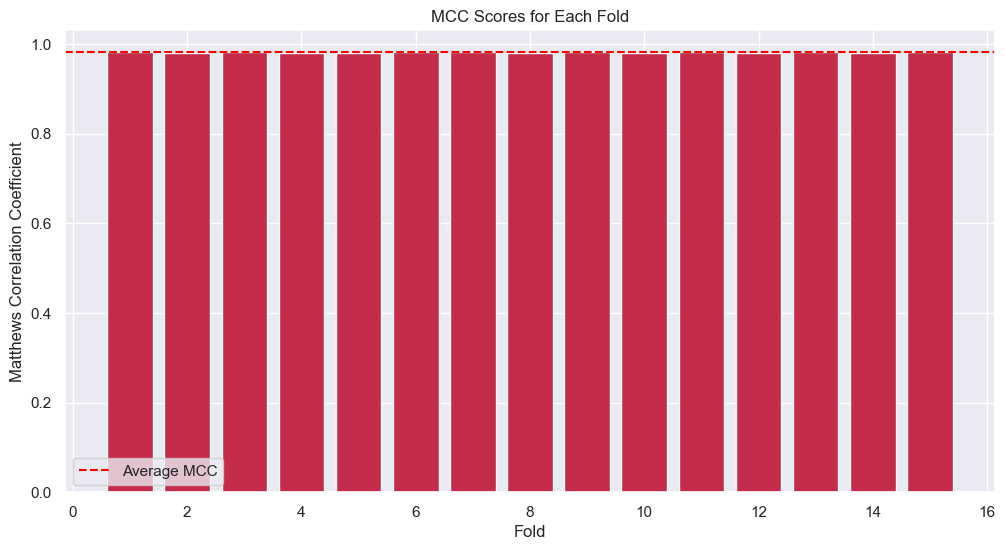

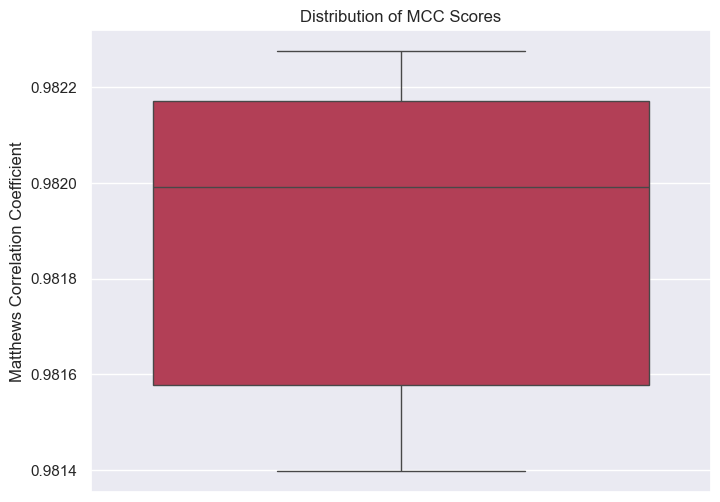

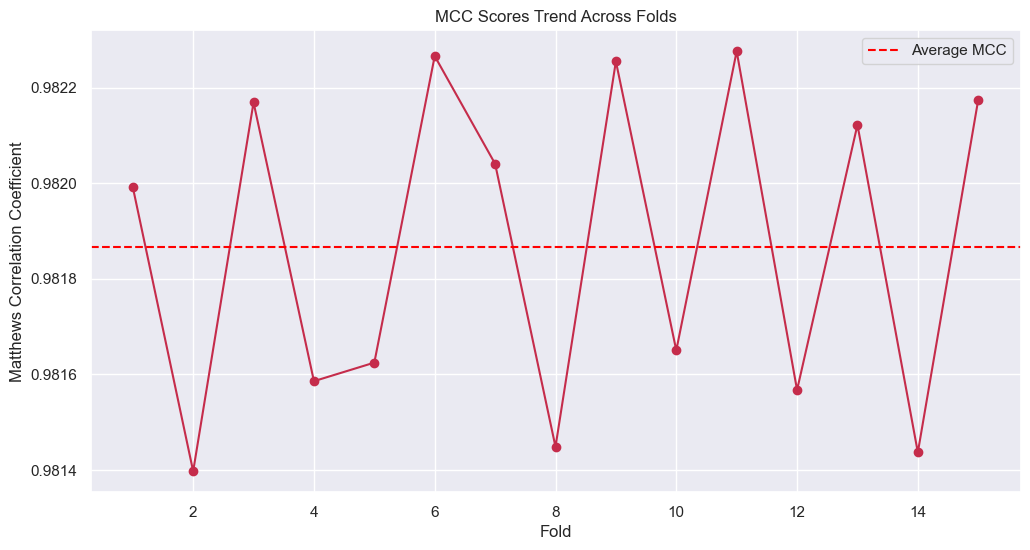

MCC 점수 통계:
최소값: 0.9814
최대값: 0.9823
평균: 0.9819
표준편차: 0.0003


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 각 폴드별 MCC 점수 막대 그래프
plt.figure(figsize=(12, 6))
plt.bar(range(1, n_splits + 1), mcc_scores)
plt.axhline(y=average_mcc, color='r', linestyle='--', label='Average MCC')
plt.xlabel('Fold')
plt.ylabel('Matthews Correlation Coefficient')
plt.title('MCC Scores for Each Fold')
plt.legend()
plt.show()

# 2. MCC 점수 분포를 보여주는 박스 플롯
plt.figure(figsize=(8, 6))
sns.boxplot(y=mcc_scores)
plt.ylabel('Matthews Correlation Coefficient')
plt.title('Distribution of MCC Scores')
plt.show()

# 3. 평균 MCC 점수를 강조하는 선 그래프
plt.figure(figsize=(12, 6))
plt.plot(range(1, n_splits + 1), mcc_scores, marker='o')
plt.axhline(y=average_mcc, color='r', linestyle='--', label='Average MCC')
plt.xlabel('Fold')
plt.ylabel('Matthews Correlation Coefficient')
plt.title('MCC Scores Trend Across Folds')
plt.legend()
plt.show()

# 추가: MCC 점수 통계 출력
print(f"MCC 점수 통계:")
print(f"최소값: {min(mcc_scores):.4f}")
print(f"최대값: {max(mcc_scores):.4f}")
print(f"평균: {average_mcc:.4f}")
print(f"표준편차: {np.std(mcc_scores):.4f}")

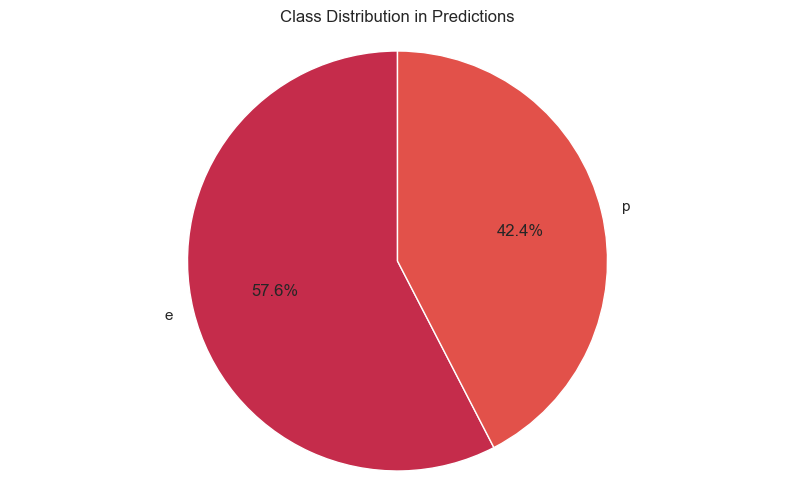

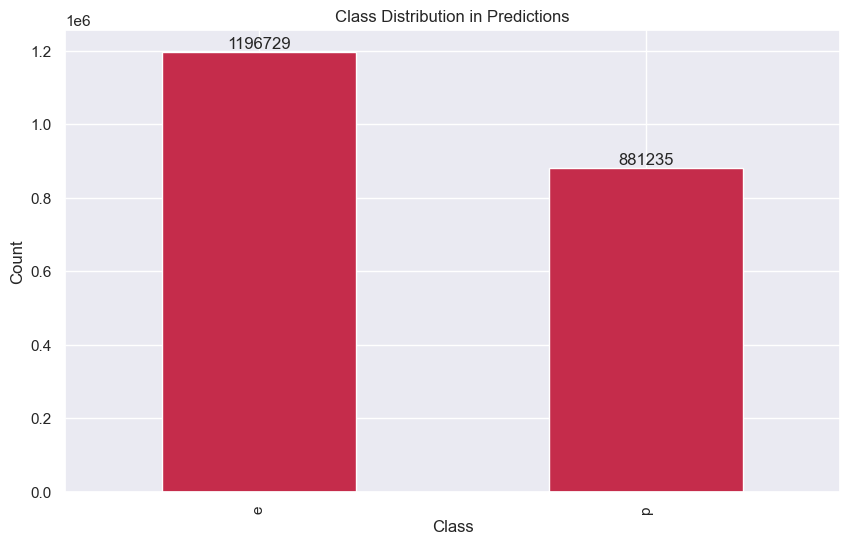

클래스 분포:
e: 1196729 (57.59%)
p: 881235 (42.41%)


In [46]:
import matplotlib.pyplot as plt

# 클래스 빈도 계산
class_counts = output['class'].value_counts()

# 1. 원형 차트
plt.figure(figsize=(10, 6))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in Predictions')
plt.axis('equal')  # 원을 완벽한 원형으로 만듭니다
plt.show()

# 2. 막대 그래프
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution in Predictions')
plt.xlabel('Class')
plt.ylabel('Count')
for i, v in enumerate(class_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

# 3. 클래스 분포 출력
total = len(output)
print("클래스 분포:")
for class_name, count in class_counts.items():
    percentage = (count / total) * 100
    print(f"{class_name}: {count} ({percentage:.2f}%)")